In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from helper_functions import (races)
%matplotlib inline

In [2]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pywaffle import Waffle

In [4]:
# %load helper_functions.py
#!/usr/bin/env python

# In[ ]:

races = {
    1:"White",
    2:"Asian",
    21:"Asian",
    22:"Asian",
    23:"Asian",
    24:"Asian",
    25:"Asian",
    26:"Asian",
    27:"Asian",
    3:"Black",
    4:"Hawaiian/Pacific",
    41:"Hawaiian/Pacific",
    42:"Hawaiian/Pacific",
    43:"Hawaiian/Pacific",
    44:"Hawaiian/Pacific",
    5:"White",
    6:"Other",
    7:"Other"
}

def get_bank_name(lei):
    import requests as rq
    URI = f"https://leilookup.gleif.org/api/v2/leirecords?lei={lei}"
    response = rq.get(URI)
    if response == 200:
        data = response.json()
    lei_data = response.json()
    res = [sub['Entity'] for sub in lei_data] 
    res2 = [sub['LegalName'] for sub in res]
    need = res2[0]
    return(need['$'])


def get_bank_cert(lei):    
    import requests as rq
    URI = f"https://leilookup.gleif.org/api/v2/leirecords?lei={lei}"
    response = rq.get(URI)
    if response == 200:
        data = response.json()
    lei_data = response.json()
    res = [sub['Entity'] for sub in lei_data] 
    res2 = [sub['RegistrationAuthority'] for sub in res]
    try:
        res3 = [sub['RegistrationAuthorityEntityID'] for sub in res2]
    except:
        return("None")
    need = res3[0]
    return(need['$'])

In [5]:
# error message because of mixed datatypes under some columns
data = pd.read_csv("state_NY.csv")
pd.set_option('display.max_columns', len(data.columns))
data.head()

/Users/jasonyang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Joint,Female,1,0,2,1,1,1,1111,1111,1111,525000.0,Exempt,Exempt,Exempt,3,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,2,1111,1111,1,Exempt,309.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,27.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,2,2,2,2,65-74,65-74,Yes,Yes,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4894,31.53,96700,117,1378,1715,32
1,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,2,1,1,1,1111,1111,1111,355000.0,Exempt,Exempt,Exempt,2,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,124.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,25-34,<25,No,No,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7540,16.31,96700,111,2074,2689,36
2,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,3,2,1,1,1,1111,1111,1111,445000.0,Exempt,Exempt,Exempt,3,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,196.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,1,2,2,2,35-44,35-44,No,No,1111,1111,1111,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5073,13.60,96700,150,1554,1952,33
3,2019,549300W2DSERWC01YR18,39100,NY,36071.0,3.607101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,0,2,1,1,1,1111,1111,1111,235000.0,Exempt,Exempt,Exempt,2,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1111,1111,1111,1111,Exempt,1,1,1111,1111,1,Exempt,137.0,Exempt,1111,1111,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2

## Data Cleaning

### 1) Drop columns unrelated to analysis or goals

In [6]:
# all homes in dataset locted in NY and mortgage financed in 2019 -> drop msa in favor of more specific county code
data.drop(['activity_year', 'census_tract', 'state_code', 'derived_msa-md'], axis=1, inplace=True)

# analysis will rely on precise applicant race/ethnicity/sex and primry data rather than aggregated categories
data.drop(['derived_ethnicity', 'derived_race', 'derived_sex', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 
            'applicant_ethnicity-4', 'applicant_ethnicity-5', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3', 
            'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'applicant_race-2', 'applicant_race-3',
            'applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3',
            'co-applicant_race-4', 'co-applicant_race-5', 'derived_dwelling_category'], axis=1, inplace=True)

# drop columns reflecting whether applicant information was collected on the basis of visual observation/surname
data.drop(['applicant_ethnicity_observed', 'co-applicant_ethnicity_observed', 'applicant_race_observed',
            'co-applicant_race_observed', 'applicant_sex_observed', 'co-applicant_sex_observed'], axis=1, inplace=True)

# irrelevant to analysis goals
data.drop(['construction_method', 'submission_of_application', 'purchaser_type', 'tract_median_age_of_housing_units',
            'business_or_commercial_purpose', 'tract_one_to_four_family_homes', 'tract_owner_occupied_units',
            'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'reverse_mortgage',
           'applicant_age_above_62', 'co-applicant_age_above_62', 'tract_to_msa_income_percentage', 'tract_population'], axis=1, inplace=True)

# rely on initial information -> favor race over ethnicty as it is more specific
data.drop(['applicant_ethnicity-1', 'co-applicant_ethnicity-1', 'aus-2', 'aus-3', 'aus-4', 'aus-5', 'denial_reason-2',
           'denial_reason-3', 'denial_reason-4', 'co-applicant_credit_score_type'], axis=1, inplace=True)

# mortgage loan features not useful in analysis
data.drop(['aus-1', 'negative_amortization', 'other_nonamortizing_features', 'multifamily_affordable_units', 
            'initially_payable_to_institution', 'derived_loan_product_type', 'open-end_line_of_credit', 'rate_spread',
            'hoepa_status', 'prepayment_penalty_term', 'intro_rate_period', 'interest_only_payment', 'lien_status', 'balloon_payment'],
           axis=1, inplace=True)

`action_taken` column is a categorical variable consisting of: Loan originated(1), Application approved but not accepted(2), Application denied(3), Application withdrawn by applicant(4), File closed for incompleteness(5), Purchased loan(6), Preapproval request denied(7), Preapproval request approved but not accepted(8).
<br> 
Since this notebook will focus solely on approved or denied loans, we will drop all observations that is not of 'Loan origniaten', Application approved but not accepted', or 'Application denied'.

In [7]:
# drop all observations that is not of 'Loan originated', 'Application approved but not accepted' or 'Application denied'
loans = data[data['action_taken'].isin([1,2,3])].reset_index(drop=True)
loans

,lei,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income
0,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,525000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,2,1,309.0,Exempt,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700
1,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,355000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,124.0,Exempt,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700
2,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,445000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,196.0,Exempt,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700
3,549300W2DSERWC01YR18,36071.0,C,1,2,1,1,235000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,137.0,Exempt,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700
4,549300W2DSERWC01YR18,36071.0,C,1,2,1,31,195000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,133.0,Exempt,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431267,549300MXJA09WZJ0DV55,36103.0,C,3,2,2,1,395000.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,360,405000,1,1,81.0,>60%,3,3.0,8.0,1,5,45-54,9999,1,71.97,124000
431268,549300MXJA09WZJ0DV55,36103.0,C,3,2,2,1,425000.0,96.5,NaN,NaN,NaN,NaN,NaN,NaN,360,435000,1,1,126.0,50%-60%,1,5.0,5.0,1,1,35-44,25-34,9,81.44,124000
431269,549300MXJA09WZJ0DV55,36059.0,C,3,2,3,32,395000.0,89.41,NaN,NaN,NaN,NaN,NaN,NaN,360,425000,1,1,81.0,42,2,3.0,8.0,1,5,45-54,9999,3,34.41,124000
431270,549300MXJA09WZJ0DV55,36103.0,C,1,2,1,1,285000.0,85.0,4.75,5128.6,NaN,1490.0,NaN,56.5,360,335000,1,1,75.0,45,2,5.0,8.0,1,5,25-34,9999,10,95.89,124000


### 2) Change lei code to appropriate lender institution name

In [8]:
# lei identifies a lender institution, we want to convert lei into institution names 
unique_lei = list(loans['lei'].unique())
unique_lei_dict = dict(zip(unique_lei, [None]*len(unique_lei))) 
dict(list(unique_lei_dict.items())[:10])  

{'549300W2DSERWC01YR18': None,
 '549300E3X7YDJIUENL65': None,
 '254900WTZC5SSKIN2M11': None,
 '5493003GQDUH26DNNH17': None,
 '254900791X4X11AYVA11': None,
 '5493005ZSV53K4M63M18': None,
 '5493002PPPIVY6G0AH03': None,
 '549300IL3HLQ2SW5VN73': None,
 '549300A0SVCQJPHVGV20': None,
 '5493002DRIX59V47NM65': None}

In [9]:
#  Converts lender lei code to institution name by API call.
#  Parameters:
#    lei - lender lei code to pass to API endpoint
#  Return value:
#    institution name associated with lei code
def get_bank_name(lei):
    import requests as rq
    URI = f"https://leilookup.gleif.org/api/v2/leirecords?lei={lei}"
    response = rq.get(URI)
    if response == 200:
        data = response.json()
    lei_data = response.json()
    res = [sub['Entity'] for sub in lei_data] 
    res2 = [sub['LegalName'] for sub in res]
    need = res2[0]
    return(need['$'])

In [10]:
# # loop through lei dictionary and replace values with institution name
# for k, v in unique_lei_dict.items():
#     if v is None:
#         unique_lei_dict[k] = get_bank_name(k)

unique_lei_dict = {'7H6GLXDRUGQFU57RNE97': 'JPMorgan Chase Bank, National Association',
                     '549300FGXN1K3HLB1R50': 'QUICKEN LOANS, LLC',
                     'KB1H1DSPRFMYMCUFXT09': 'Wells Fargo Bank, National Association',
                     'B4TYDEB6GKMZO031MB27': 'Bank of America, National Association',
                     'DRMSV1Q0EKMEXLAU1P80': 'Citizens Bank, National Association',
                     'E57ODZWZ7FF32TWEFA76': 'Citibank, National Association',
                     'WWB2V0FCW3A0EE3ZJN75': 'Manufacturers and Traders Trust Company',
                     '549300KTR1JGH3K6LU06': 'Bethpage Federal Credit Union',
                     '03D0JEWFDFUS0SEEKG89': 'TD Bank, National Association',
                     'HUX2X73FUCYHUVH1BK78': 'KeyBank National Association',
                     '549300AG64NHILB7ZP05': 'LOANDEPOT.COM, LLC',
                     '549300KUYF5QOROM7N37': 'ESL Federal Credit Union',
                     '549300HW662MN1WU8550': 'UNITED SHORE FINANCIAL SERVICES, LLC',
                     'X05BVSK68TQ7YTOSNR22': 'Discover Bank',
                     '549300T3F9S1MKFKHC53': 'HOMESTEAD FUNDING CORP.',
                     '549300LYRWPSYPK6S325': 'FREEDOM MORTGAGE CORPORATION',
                     '5493005RDTT7HVODH436': 'Community Bank, National Association',
                     '549300LBCBNR1OT00651': 'NATIONSTAR MORTGAGE LLC',
                     '54930085BPQMVH9JFX69': 'HUDSON VALLEY CREDIT UNION',
                     'TR24TWEY5RVRQV65HD49': 'Santander Bank, N.A.',
                     '549300T7DF901BR7V258': 'Nassau Educators Federal Credit Union',
                     '254900XN7UWEWK13RO81': 'Premium Mortgage Corp.',
                     '549300RJW4T6MPVUPK44': 'SEFCU SERVICES, LLC',
                     '5493008RNHC5I1E3IZ56': 'STATE EMPLOYEES FEDERAL CREDIT UNION',
                     '549300R8VPSFM828B312': 'TEACHERS',
                     '549300FNXYY540N23N64': 'NEWREZ LLC',
                     '549300YKTME1U7Z0UN20': 'Empower Federal Credit Union',
                     '549300GCEP3NM7A1X491': 'TrustCo Bank',
                     '5493009BOQDC6PCFR785': 'NBT Bank, National Association',
                     '5493001WHVQBGRSWEU75': 'HOMEBRIDGE FINANCIAL SERVICES, INC.',
                     '549300ZGZ9WQMJLEPH17': '1ST PRIORITY MORTGAGE, INC.',
                     '549300121SF0K2LN2804': 'PRIMELENDING, A PLAINSCAPITAL COMPANY',
                     '5493002C1SVHOFTWF108': 'AmeriCU Credit Union',
                     '549300JYXTZDSPJEPI44': 'PLAZA HOME MORTGAGE, INC.',
                     '1IE8VN30JCEQV1H4R804': 'HSBC BANK USA, NATIONAL ASSOCIATION',
                     'YWC0TIKBQM2JV8L4IV08': 'First Republic Bank',
                     '549300J7XKT2BI5WX213': 'CALIBER HOME LOANS, INC.',
                     '254900ACUWEGW702BR80': 'FM Home Loans, LLC',
                     '549300LLKEKXL2RM1F61': 'CONTOUR MORTGAGE CORPORATION',
                     'LVR1UQE8OOCO93IHEB52': 'Northwest Bank',
                     '5493005ICQ3QGEIWV618': 'UNITED MORTGAGE CORP.',
                     '549300VZVN841I2ILS84': 'CROSSCOUNTRY MORTGAGE, LLC',
                     '549300VG7NKKVNYENV67': 'CCFCU FUNDING, LLC',
                     '549300RUF3KS47ETXV22': 'CAPITAL COMMUNICATIONS Federal Credit Union',
                     '5493008TO7JB5Q4IKZ94': 'HUNT MORTGAGE CORPORATION',
                     '5493003GQDUH26DNNH17': 'NAVY FEDERAL CREDIT UNION',
                     '6BYL5QZYBDK8S7L73M02': 'U.S. Bank National Association',
                     '549300TDVGWRELEO5F50': 'VISIONS',
                     '549300BX448ALT10FI43': 'The Federal Savings Bank',
                     '549300U3721PJGQZYY68': 'GUARANTEED RATE, INC.',
                     '549300BRR67NLTQSBT29': 'HOME TOWN FUNDING, INC.',
                     '5493006LH4LKHY2EIN26': 'Five Star Bank',
                     '549300CLRXFVF83ZL806': 'NATIONWIDE MORTGAGE BANKERS, INC.',
                     'C5654JQHZUHN0772B561': 'USAA Federal Savings Bank',
                     '549300ZSFNMHET4KE860': 'THE SUMMIT Federal Credit Union',
                     'AD6GFRVSDT01YPT1CS68': 'PNC Bank, National Association',
                     '549300BRJZYHYKT4BJ84': 'HOME POINT FINANCIAL CORPORATION',
                     '549300VUQ4KD10YTTM53': 'Genesee Regional Bank',
                     '2549008X67CV1MNM7747': 'MEADOWBROOK FINANCIAL MORTGAGE BANKERS CORP.',
                     'KI0VI4JRMCIJ329YTN75': 'Valley National Bank',
                     '549300DD4R4SYK5RAQ92': 'MOVEMENT MORTGAGE, LLC',
                     'SS1TRMSN6BRNMOREEV51': 'Flagstar Bank, FSB',
                     'F28JOQ8OBWCFUYM0UX93': 'East West Bank',
                     '254900Q6IHGQO7INVC79': 'The Lyons National Bank',
                     '5493007WEU5TWM8J0Z93': 'PARAGON HOME LOANS INC.',
                     '549300WK15ESCDNJ5M35': 'CORNING',
                     '549300VORTI31GZTJL53': 'CARDINAL FINANCIAL COMPANY, LIMITED PARTNERSHIP',
                     'N4662XQCE3KKIZ6EZS08': "People's United Bank, National Association",
                     '549300YW2UBCMDRMBT48': 'RELIANCE FIRST CAPITAL, LLC',
                     '54930017CJWOENP0BZ82': 'SUNMARK FEDERAL CREDIT UNION',
                     '549300NWYTCEH9RSSW54': 'SUFFOLK',
                     '549300R9S3MVDV4MGF56': 'Carrington Mortgage Services, LLC',
                     '549300XQVJ1XBNFA5536': '21ST MORTGAGE CORPORATION',
                     '549300W5V403XF1RX254': 'OWNERSCHOICE FUNDING, INCORPORATED',
                     '5493008GTOZI3HQKE634': 'Ulster Savings Bank',
                     '549300TCY9QY8BRDQJ12': 'UNITED NORTHERN MORTGAGE BANKERS LIMITED',
                     '5493009DTDMV4MI5MT96': 'PARKSIDE LENDING, LLC',
                     'FT6J43S06X6CLJ0R0B48': 'Cathay Bank',
                     '549300DMIVL13D62WX91': 'InterContinental Capital Group, Inc',
                     '213800QUAI2VH5YM6310': 'EMBRACE HOME LOANS, INC.',
                     '549300D2T1KWYCTPUZ21': 'Elmira Savings Bank',
                     '2549006T9J2DMLJVRS64': 'Municipal Credit Union',
                     '549300ERHDU3FCE3FA33': 'Glens Falls National Bank and Trust Company',
                     '549300DD5QQUHO6PCH70': 'Mortgage Research Center, LLC',
                     '549300E3VF26P7719Z56': 'RELIANT COMMUNITY FEDERAL CREDIT UNION',
                     '5493008CPTDVOS570626': 'Third Federal Savings and Loan Association of Cleveland',
                     'PAOOWF3GUFM46FBSP561': 'PHH Mortgage Corporation',
                     '5493006Z1T521ODWBA53': 'NORTHERN CREDIT UNION',
                     '549300GS0W0TEUQS8571': 'Morgan Stanley Private Bank, National Association',
                     '549300U4FBW37LFHW771': 'JET DIRECT FUNDING CORP',
                     'WV0OVGBTLUP1XIUJE722': 'Webster Bank, National Association',
                     '549300MGPZBLQDIL7538': 'FAIRWAY INDEPENDENT MORTGAGE CORPORATION',
                     '254900TM81D0YC1B9584': 'Metro City Bank',
                     '549300NBSU5FHMDN5F74': 'FIRST SOURCE',
                     '549300QPD4M26VIOFU53': 'SUMMIT MORTGAGE BANKERS INC.',
                     '5493002VB77GOYB9O402': 'Investors Bank',
                     '549300RM7ARTTP3T1V93': 'The Canandaigua National Bank and Trust Company',
                     '549300YLIY5SO2XSK094': 'Ridgewood Savings Bank',
                     '549300NZ2IPWRMLAYZ30': 'MID-ISLAND MORTGAGE CORP.',
                     '5Z1UQ1CWY0DQ3KJWDQ07': 'TIAA, FSB',
                     '549300LI3FDGO7UKFF39': 'East Coast Capital Corp.',
                     'QODK9N71Q3XVQS2JKH91': 'New York Community Bank',
                     '5493001VQ02LHMFEXJ21': 'MID-HUDSON VALLEY',
                     '549300LR1ZETOWYE9Z89': 'Berkshire Bank',
                     '5493008VCYW25D52ZC98': 'ARK MORTGAGE, INC.',
                     '54930091JQKCU3Z6IP44': 'LendingOne, LLC',
                     '549300ZZIAVB1U6Z4S78': 'CFCU Community Credit Union',
                     '549300FX7K8PTEQUU487': 'PENTAGON FEDERAL CREDIT UNION',
                     '549300Q3ROEQU3D1IW91': 'CREDIT HUMAN FEDERAL CREDIT UNION',
                     '549300TINI6CL78UD591': 'AMERICAN ADVISORS GROUP',
                     '2549004XJQQPBYQSMT39': 'Quontic Bank',
                     '5493005XCKCOIX4JMI33': 'RESIDENTIAL HOME FUNDING CORP.',
                     '549300M8DR00HTG3MF34': 'ACADEMY MORTGAGE CORP.',
                     '549300GWD9H4FQ2VR805': 'UBS Bank USA',
                     '254900P6Q7UI8DAKYX49': 'GuardHill Financial Corp.',
                     '549300HTMO7FGRKRLV06': 'CLIFFCO, INC.',
                     '5493007G2SOD8W9RK547': 'FIRST NEW YORK',
                     '549300E4YLQ3BVQ4GW30': 'WALL STREET MORTGAGE BANKERS, LTD.',
                     '549300WU17K1CLH8VI32': 'Chemung Canal Trust Company',
                     '549300S5YL3OH0IVCS62': 'FINANCE OF AMERICA REVERSE LLC',
                     '549300HCNXMTNGIMAR91': 'United Nations Federal Credit Union',
                     '549300UG7QXKM7KGV847': 'ROYAL UNITED MORTGAGE LLC',
                     '549300IGSWBIHAL67063': 'RESIDENTIAL MORTGAGE SERVICES, INC.',
                     '254900C44LTMSEGQ5K05': 'ISLAND',
                     '549300EZG6KIP4HOUR65': 'Adirondack Bank',
                     '5493006F1L6NRWMNY260': 'Hanover Community Bank',
                     '254900V6GCDMRQZ34D96': 'Luxury Mortgage Corp.',
                     '549300E0WPRCJMXMUM09': 'Popular Bank',
                     '549300XZF8VZFNRNBW38': 'Geddes Federal Savings and Loan Association',
                     '549300CB67L6KPJLHE19': 'TRIAD FINANCIAL SERVICES, INC.',
                     '549300EZIROI6ZF7B419': 'FAMILY FIRST OF NY',
                     '2549009V3JISNNLCD785': 'FAMILY FIRST FUNDING LLC',
                     '254900Q6YS0NMCYAH669': 'Tompkins Trust Company',
                     '5493003B20KZ3DEZGB43': 'Royal Business Bank',
                     '549300J6N77Q8OHYNF23': 'ENVOY MORTGAGE, LTD',
                     '54930039IUN6515TBG78': 'US MORTGAGE CORPORATION',
                     '5493000XMEVMIQFXVW32': 'COMMONFUND MORTGAGE CORP.',
                     '5493002JNEZK52NOPC21': 'Saratoga National Bank and Trust Company',
                     '549300JZD4L02YZI3Z50': 'NJ LENDERS CORP.',
                     '254900NZOY3XB2DNSZ34': 'USAlliance Federal Credit Union',
                     '549300256FCWXUM5FR50': 'Pioneer Bank',
                     '549300IL3HLQ2SW5VN73': 'ASSOCIATED MORTGAGE BANKERS, INC.',
                     '549300H0B8QZSS10X971': 'FIRST HERITAGE FEDERAL CREDIT UNION',
                     '549300S347HTLHLOC775': 'FIRST CREDIT CORPORATION OF NEW YORK, INC.',
                     '549300G0QSZVT1E3RS89': 'The Bank of Greene County',
                     '549300W2DSERWC01YR18': 'Walden Savings Bank',
                     '549300GJGUHNTC6JI536': 'TCF National Bank',
                     '549300KBBVNTCW1SWC68': 'Fairport Savings Bank',
                     '254900ZPR9P3OI95VG04': 'CONTINENTAL MORTGAGE BANKERS, INC.',
                     '549300ZEHLZ064G58146': 'Sterling Bank and Trust, FSB',
                     '5493006RIR31ORKYB608': 'LAND HOME FINANCIAL SERVICES, INC.',
                     '549300ODXRVTZ21MSR34': 'Rondout Savings Bank',
                     '5493001GAASLCSP1PB64': 'NATIONAL COOPERATIVE BANK, N.A.',
                     '254900TTZ395IC926125': 'Sierra Pacific Mortgage Company, Inc.',
                     '549300P3STF5YYEJYO93': 'Pittsford Federal Credit Union',
                     '549300K6K2IS7FRS7S09': 'North American Savings Bank, F.S.B.',
                     '549300TA4MQM8WN2XG31': 'VELOCITY COMMERCIAL CAPITAL, LLC',
                     '5493007D8SNLKCBE4P48': 'Alden State Bank',
                     '549300GKFNPRWNS0GF29': 'CMG MORTGAGE, INC.',
                     '549300QY4UCP33T94N09': 'Ballston Spa National Bank',
                     '254900JXCS783CPF1D02': 'RCN Capital, LLC',
                     '5493002PHB6PE87OB729': 'Tioga State Bank',
                     '549300Z1CDO1XR2ZMQ19': 'HUDSON RIVER COMMUNITY',
                     '593C3GZG957YOJPS2Z63': 'City National Bank',
                     '254900WBNJ2MGXXXDY75': 'Pathfinder Bank',
                     '549300RYWXR8TL5LIK35': 'ALLIED MORTGAGE GROUP, INC.',
                     '549300BOYV1JVWTO8O89': 'Solvay Bank',
                     '254900YY8IQK41QDLZ95': 'Advantage Federal Credit Union',
                     '549300QVXT6121Q7E798': 'Flushing Bank',
                     'VLP5AP0XK2GM6GKD1007': 'Signature Bank',
                     '254900158KALQ2PWDU44': 'The Adirondack Trust Company',
                     'C398JSK21YCXWM603F55': 'Barrington Bank & Trust Company, N.A.',
                     '254900DNLSAVSRPDRK61': 'Carthage Federal Savings and Loan Association',
                     '54930048P8RWCQHQM310': 'ARC HOME LLC',
                     '549300KOLMR4MSUXQS86': 'The National Bank of Coxsackie',
                     '54930075J06TVV0VZ870': 'SYRACUSE SECURITIES, INC.',
                     '549300A7YGYUVVWJ2M57': 'LYNX MORTGAGE BANK LLC',
                     '254900MWCJLSHMSYCL19': 'TEG Federal Credit Union',
                     '2549002A7VC63ZJQY749': 'The Bank of Castile',
                     '549300RD5IG88VPO6P22': 'GUIDANCE RESIDENTIAL, LLC',
                     '549300S5NLOTO329NX77': 'Farm Credit East, ACA',
                     '213800XR2TCBQJSF1X93': 'NBKC BANK',
                     '549300G4F3X6FTMZP579': 'Rhinebeck Bank',
                     '549300F7JKU0UTD6KX15': 'Evans Bank, National Association',
                     '5493008UZWYHK74O4341': 'GPO Federal Credit Union',
                     '5493003X6Y6JGJKHPA25': 'INTERSTATE HOME LOAN CENTER, INC.',
                     '549300S5FSS555M0NA74': 'First National Bank of Scotia',
                     '549300BN4MNW5KE16X83': 'Northfield Bank',
                     '549300NVMV4W48B8SC18': 'Watertown Savings Bank',
                     '549300FEBB5EMDXTC518': 'Lake Shore Savings Bank',
                     '5493001IKIPQ6O5UGV92': 'FINANCE OF AMERICA COMMERCIAL LLC',
                     '207ALC1P1YM0OVDV0K75': 'Capital One, National Association',
                     '549300KBWX4NV5Q1E376': 'NVR Mortgage Finance, Inc.',
                     '5493002B2WMHY23GFK92': 'AMERICAN FINANCIAL RESOURCES, INC.',
                     '549300NBFK4GO76FTE84': 'CNB Bank',
                     '5493005ZSV53K4M63M18': 'HUDSON HERITAGE',
                     '549300DMI3W6YLDVSK93': 'First Home Bank',
                     '549300Q1QXZDN5R0UD44': 'Jeff Bank',
                     '254900FMBXF85WQYV433': 'Amalgamated Bank',
                     '549300NGNH7M36LP4583': 'Maspeth Federal Savings and Loan Association',
                     '5493008EBYLPD4MM3C30': 'Mortgage World Bankers, Inc.',
                     '549300EHC6INE5XY6I44': 'ONE REVERSE MORTGAGE, LLC',
                     '95JW06YV3JUTCH0IJV88': 'Fulton Savings Bank',
                     '254900AU2FARCMPNA566': 'Bank of Holland',
                     '254900OTZY4BREZQZ902': 'Steuben Trust Company',
                     '5493008NWHQT1R22C024': 'AMERICAN FINANCIAL NETWORK, INC.',
                     '549300IRXW9RSZM2B951': 'Evolve Bank & Trust',
                     '549300TZDKJ07KL8T621': 'PCSB Bank',
                     '549300ZUZB0H1M5M3I66': 'State Farm Bank, F.S.B.',
                     '549300C04BJ0G297NC13': 'Ally Bank',
                     '5493004UNRG4PWDF2K60': 'AFFINITY',
                     '549300RWP6SKF6EZZP82': 'Dime Community Bank',
                     '549300410TULSMMGDX92': 'Pacific Union Financial, LLC',
                     '254900YV0O58MHFPZV28': 'Generations Bank',
                     '5493006O6Q2F0MR0ZM22': 'Visio Financial Services Inc.',
                     '549300XWUSRVVOHPRY47': 'EVERETT FINANCIAL, INC.',
                     '549300A23PXRZCMYM504': 'TCT',
                     '549300T94GSH3C4U5M59': 'ALLIANT CREDIT UNION',
                     '5493008KVNSBXMICV874': 'PS FUNDING, INC.',
                     '2549009X2AG1P20YAJ63': 'Axos Bank',
                     '549300OFI1WD07JPI032': 'SILVERMINE VENTURES LLC',
                     '549300MXJA09WZJ0DV55': 'FINANCE OF AMERICA MORTGAGE LLC',
                     '549300GY4NTTEM7WWB64': 'Bank of England',
                     '549300EHQ0Y7SP41BR91': 'ATHAS CAPITAL GROUP, INC.',
                     '549300BDZCCADL2HG292': 'Wallkill Valley Federal Savings and Loan Association',
                     'KD3XUN7C6T14HNAYLU02': 'Goldman Sachs Bank USA',
                     '549300QUX3LK82LO3013': 'LIBERTY HOME EQUITY SOLUTIONS, INC.',
                     '549300VGMMXKSX821O69': 'HARTFORD FUNDING, LTD.',
                     '549300SK2GVCQXPD4S58': 'SUN WEST MORTGAGE COMPANY, INC.',
                     '5493006VAGP3GQ8FJT49': 'LENDINGHOME FUNDING CORPORATION',
                     '549300ALNLUNS3Y53T24': 'AMERICAN FINANCING CORPORATION',
                     '549300OR8H1MIJLGWX42': 'Bank of Akron',
                     '549300HNL0XN9S0MZM92': 'EQUITY NOW INC.',
                     '549300RMFYMDOOF4BO45': 'XCEED FINANCIAL',
                     '254900SK7KTN4QNPHP32': 'Citizens & Northern Bank',
                     '549300REENMLD2RN3W58': 'Magnolia Bank',
                     '549300TN38DPH732VI61': 'Sterling National Bank',
                     '254900RKU25JCJEP4R59': 'SECNY Federal Credit Union',
                     '549300Q50XCC0473FG63': 'QUORUM FEDERAL CREDIT UNION',
                     '549300VJQJVZKJBDWS17': 'TOTAL MORTGAGE SERVICES, LLC',
                     'WKN6AF1FCL7BBYGTGI83': 'First Savings Bank',
                     '5493002HK8IUOTMHKS81': 'EMIGRANT MORTGAGE COMPANY, INC.',
                     '549300XZGHPTWOJPDI31': 'Wayne Bank',
                     '549300UWA74T8PF7KY34': 'BNB Bank',
                     'CKVBED0S4DMLKJJ5XH28': 'Stifel Bank and Trust',
                     '549300DW87L2IZ7ZHF47': 'MLB RESIDENTIAL LENDING, LLC',
                     '549300YM15OICCNPH537': 'GREENWAY MORTGAGE FUNDING CORP.',
                     '5493004RLLKTQS8K7U51': 'American Airlines Federal Credit Union',
                     '254900LTYFDA8IOP9O78': 'Cornerstone Community Federal Credit Union',
                     '254900QLWNRZD8ZK6O36': 'Mahopac Bank',
                     '5493008S1VWGM1A22245': 'PRIORITY FUNDING, LLC',
                     '5493007Z7FTUKQGFMZ98': 'GREYSTONE SERVICING COMPANY LLC',
                     '549300ZGCIDP1G72QO72': 'Cf Bank, National Association',
                     '549300YOGGZET04TZM44': 'Abacus Federal Savings Bank',
                     '549300RUKY2I2HQ2AI44': 'POLISH & SLAVIC FEDERAL CREDIT UNION',
                     '549300WH9FMXOC63ZV77': 'NATIONWIDE EQUITIES CORPORATION',
                     '549300LCMQJZBJE7EL26': 'GHS Federal Credit Union',
                     '549300QYX5EMLSR68B45': 'Gouverneur Savings and Loan Association',
                     '5493009BD405QQTMXO12': 'TBI MORTGAGE COMPANY',
                     '254900FDN5GT0HEKMT95': 'Western Division Federal Credit Union',
                     '549300YQJU3WVKMRXR40': 'PATRIOT ONE MORTGAGE BANKERS, LLC',
                     '549300K74HMS2QKZU479': 'COUNTRYSIDE Federal Credit Union',
                     '549300T1F1BRPWSZT586': 'GENESEE VALLEY',
                     '549300GNMONGVTFMXS97': 'BLAIR SERVICES OF AMERICA INC.',
                     '549300EFCZM6KD6B8K69': 'MORTGAGE ACCESS CORP.',
                     '549300QWZP1DM0Q04B39': 'USNY Bank',
                     'WO4YNEKNSZNVVA7Q7C46': 'The First National Bank of Long Island',
                     '5493009U7VIT7UF4QH15': 'ONTARIO SHORES',
                     '549300BOXNV8VLRBDT24': 'AMERICAN INTERNET MORTGAGE, INC.',
                     '549300N1UWZ4871DND44': 'Apple Bank for Savings',
                     '549300U2WRK55BY8UC05': 'IMPAC MORTGAGE CORP.',
                     '4EP6JBYBTPTQ47LZOB67': 'BNY Mellon, National Association',
                     '549300MMIZD8222YV754': 'First Guaranty Mortgage Corporation',
                     '549300JEHXW73XYX6533': 'Cattaraugus County Bank',
                     '549300J59G4M2OH83E71': 'Sawyer Savings Bank',
                     '254900HXPUN0BQEZ4350': 'Alternatives Federal Credit Union',
                     '549300ASFUWYQO0RW077': 'Arbor Realty Trust, Inc.',
                     '549300HG6U7GIJKDOO88': 'EMIGRANT FUNDING CORPORATION',
                     '549300B81YWV4GBENI49': 'First Internet Bank of Indiana',
                     '549300PE7I3IWSUX2B53': 'Salisbury Bank and Trust Company',
                     '549300VQSHPYTNCOP496': 'LYONS MORTGAGE SERVICES, INC.',
                     '2549009DWV1Z50JILS65': 'The First National Bank of Groton',
                     '549300INFJ8TYNZ1G568': 'Charles Schwab Bank, SSB',
                     '5493004N6GEASXJ2A896': 'Global Bank',
                     '5493005ONLDV0W4QDI82': 'Orange Bank &Trust Company',
                     '549300SPVF3S3T0BYL87': 'Bank of Richmondville',
                     '549300G86QJ4YLR90O89': 'Empire State Bank',
                     '549300R22XCNNGVXRO22': 'SELF RELIANCE NY Federal Credit Union',
                     '549300GCNN38YBSHN374': 'FINGER LAKES',
                     'Q708HHR4LD2B7XIZNO92': 'First Federal Bank',
                     '5493008FJUGC53MGWP13': 'Savannah Bank National Association',
                     '549300038578ZJ284Y20': 'SILVER HILL FUNDING, LLC',
                     '549300KWKWPEKL40WD44': 'AMERICAN FEDERAL MORTGAGE CORPORATION',
                     '254900F9ZTVTX763V835': 'Advisors Mortgage Group, L.L.C.',
                     '549300V56OLT434ILO42': "NIAGARA'S CHOICE",
                     '549300SKTBTC2QFDKG02': 'Centier Bank',
                     '7E1PDLW1JL6TS0BS1G03': 'SUNTRUST BANKS, INC.',
                     '549300K4ZLGS7SRDTL86': 'Equity Prime Mortgage LLC',
                     '5493001FKX0BM8GN6P73': 'Woori America Bank',
                     'H98JYKDFKFZ5ZPCSMT69': 'Iberiabank',
                     '254900VRRL70B52CAL31': 'Meridia Community Federal Credit Union',
                     'FU7RSW4CQQY98A2O7J66': 'BOKF, National Association',
                     '254900WTZC5SSKIN2M11': 'First National Bank of America',
                     '5493002R2CJ2LF78PR19': 'Seneca Savings',
                     '5493005LWLLN6G3XQP35': 'CTBC Bank Corp. (USA)',
                     '549300EZ060LDD77JC03': 'Shinhan Bank America',
                     '549300OBO7DOF2KOP535': 'FirstBank',
                     '549300V4QN9VP69K5I11': 'ACCESS',
                     '254900BDGU9FU91PQA51': 'The Union Bank Company',
                     '5493007XV974105FQA68': 'BRIDGEVIEW MORTGAGE CORP.',
                     '549300BT4QFCJRGY7Y90': 'SPERRY ASSOCIATES',
                     '5493005OOIYF660YQO46': 'RESIDENTIAL HOME MORTGAGE CORPORATION',
                     '254900DS8F7DYEEO5B60': 'Moog Employees Federal Credit Union',
                     '549300K0ZDYG8YJZ3L95': 'Ponce Bank',
                     '2549005O94DAZVV0P036': 'Cross County Savings Bank',
                     '549300YV77ZZ5ADLO929': 'Habib American Bank',
                     '5493002PPPIVY6G0AH03': 'COMMUNITY RESOURCE FEDERAL CREDIT UNION',
                     '254900LNRKOG7TRURB32': 'Ukrainian Federal Credit Union',
                     '5493007V8ZEVXWVS3567': 'Cross River Bank',
                     '549300X03SL4SM0F3U87': 'ConnectOne Bank',
                     '549300R0CN5YKL3VTP86': "PEOPLE'S ALLIANCE FEDERAL CREDIT UNION",
                     '5493009OLY1HC3F0SB77': 'WILLIAM RAVEIS MORTGAGE, LLC',
                     '549300RA8E6JQC2S7K66': 'SCHOOL SYSTEMS',
                     '549300EFPV2U3PWQEN15': 'Catskill Hudson Bank',
                     '549300H12E7AUMUHP294': 'FIRST ALLIANCE HOME MORTGAGE, LLC',
                     '2549005SIVTHG14U2905': 'A&D Mortgage LLC',
                     '549300NPANOIK7XYK714': 'N C P D Federal Credit Union',
                     '549300JPGMCMBEJEK584': 'DIGITAL Federal Credit Union',
                     '549300AX5UMUZ61L1X54': 'UTILITIES EMPLOYEES CREDIT UNION',
                     '254900Y6EUNN0KGMJW67': 'Commercial Lender LLC',
                     '254900FBWEZ3YUPOBN33': 'LIMA ONE CAPITAL, LLC',
                     '254900NBFODCTL4XR339': 'The Upstate National Bank',
                     '549300LLQD0X2OTG0Y27': 'Home Loan Investment Bank, F.S.B.',
                     '2549005SKP81W00YW119': 'First National Bank of Dryden',
                     '549300N6U5XCH70TOK35': 'Kearny Bank',
                     '549300UZLRT6BCR3ZQ32': 'Empire National Bank',
                     '549300IJHNLS0J1YJW64': '5 ARCH FUNDING CORP.',
                     '549300ZJ3ZL66QGSGO48': 'Lakeland Bank',
                     '549300F8C5JA44WNMI75': 'AMERICAN NEIGHBORHOOD MORTGAGE ACCEPTANCE COMPANY LLC',
                     '549300MNG5FWXTDC2P82': 'HORIZONS Federal Credit Union',
                     '549300GZN0GWYE1KDB94': 'First Citizens Community Bank',
                     '549300GQDT484LGI9C04': 'NETWORK CAPITAL FUNDING CORPORATION',
                     '549300D6JK30QTSRHB52': 'OSWEGO COUNTY',
                     '549300JK7FP26MG28H96': 'Compass Federal Credit Union',
                     '549300C8GOC4OYUV0Z32': 'DOMINION FINANCIAL SERVICES, LLC',
                     '5493007GLUE4MCZ06K91': 'SB One Bank',
                     '549300S8SHBRCI7UU819': 'Baxter Credit Union',
                     '5493003DR10WW25HUH30': 'PALISADES FEDERAL CREDIT UNION',
                     '549300KQHWNSVCE2MY88': 'SIRVA MORTGAGE, INC.',
                     '254900FIT283V26LD641': 'Axiom Bank, N.A.',
                     '549300EMNDEK4BA8WB53': 'E MORTGAGE MANAGEMENT LLC',
                     '549300AG10BX85DF5S49': 'MLD MORTGAGE INC.',
                     '549300VAKB2KKNNL5K89': 'Country Bank Holding Company, Inc.',
                     '549300ISCZS1R0CJMO47': 'Premia Mortgage, LLC',
                     '2549009JMGPU64G0O296': 'Bank of Millbrook',
                     '254900CLULPZ13KI0S29': 'NORTHEASTERN OPERATING ENGINEERS FEDERAL CREDIT UNION',
                     '254900VFRQR5ZLXRQ298': 'Ocean Financial Federal Credit Union',
                     '549300UXY7OP0IC38293': 'Northpointe Bank',
                     '2549007AU24FVDMNUB40': 'Connexus Credit Union',
                     '549300RA8FPV4K1HE018': 'United Bank',
                     '549300LROQOOQU77WS20': 'LENOX FINANCIAL MORTGAGE CORPORATION',
                     '549300U15FR9ZPGI5T59': 'Citizens Bank of Cape Vincent',
                     '549300BU5TSYOCF3Y655': 'INLAND BANK & TRUST',
                     'ZXMJHJK466PBZTM5F379': 'Raymond James Bank, National Association',
                     '549300VYEO55JM1VUZ93': 'GREATER WOODLAWN FEDERAL CREDIT UNION',
                     '549300I1HK1BBZLKOB84': 'ADVANCIAL',
                     '549300RYTR2RVL4SFJ90': 'TEMPLE VIEW CAPITAL FUNDING, LP',
                     '0K2D5AK28E3O5CC06E35': 'Silicon Valley Bank',
                     '2WHM8VNJH63UN14OL754': 'The Huntington National Bank',
                     '549300PJX0ZHPQ614C72': 'Peoples Security Bank and Trust Company',
                     '549300E3X7YDJIUENL65': 'NUMARK CREDIT UNION',
                     '549300FZJCP0WM3QJH15': 'Peapack-Gladstone Bank',
                     '549300LH06ZZHKPX5U83': 'BNC National Bank',
                     '3T5M8FX6V6B82KVKOB17': 'Interaudi Bank',
                     '8EWQ2UQKS07AKK8ANH81': 'Deutsche Bank Trust Company Americas',
                     '549300OTLWFQPOOSC346': 'BayCoast Bank',
                     '5493002Z4GZF8C2F3T27': 'STAR USA FEDERAL CREDIT UNION',
                     '549300ZLXTW0F4QMYG11': 'BUFFALO METROPOLITAN FEDERAL CREDIT UNION',
                     '254900A69XJBWUR7ZF46': 'Mortgage Network, Inc.',
                     '549300BZNDHH8KWC0I67': 'Mortgage Unlimited, L.L.C.',
                     '549300TJGBPVMBWV5P74': 'Admirals Bank',
                     '254900L3N47KFV5KSJ32': 'Financial Trust',
                     '254900KKWIJLOTNP7667': 'M&T Realty Capital Corporation',
                     '5493001JT9MT3Z3Y3M39': 'RBC Bank, (Georgia) National Association',
                     '549300LFHSPQF8FQR548': 'Actors Federal Credit Union',
                     '54930091CYUK2SDZ6D37': 'BM Real Estate Services, Inc.',
                     '5493001MZ7BCQZ336S33': 'ATLANTIC HOME LOANS, INC.',
                     '549300RUVVJLHQM71O74': 'BCB Community Bank',
                     'N8T7HW55LK5D2ORCKP39': 'First National Bank of Pennsylvania',
                     '5493003XLOX5FDT9R120': 'First Hope Bank, A National Banking Association',
                     '549300P6D12TWGGIV170': 'GREAT ERIE',
                     '549300DNWSJUNAWUM003': 'CREDIT UNION MORTGAGE ASSOCIATION, INC.',
                     '7G95BGMCIZTO8KTOM640': 'Spencer Savings Bank, SLA',
                     '2549008CZOYIG4FIKS25': 'Congressional Bank',
                     'JJKC32MCHWDI71265Z06': 'Truist Bank',
                     'MCXHCL35UUWDZK7NCQ61': 'S&T Bank',
                     '5493001850NMVU84ZW56': 'XCEL FEDERAL CREDIT UNION',
                     '549300JOT0D4J0SZIK67': 'THE MONEY SOURCE INC.',
                     '549300Z4ZK628DTL4L52': 'MidAmerica National Bank',
                     'YJMYTIGWK1HM7EQ06C15': 'MB Financial Bank, National Association',
                     '5493006Q0EMYD3OJ8N13': 'BAC Florida Bank',
                     '549300AOB4S7B0DB7863': 'JUSTICE Federal Credit Union',
                     '549300EMNQ2QLOEPQ289': 'Colonial Savings, F.A.',
                     '549300JGMQJ4R419LR70': 'ORIX REAL ESTATE CAPITAL, LLC',
                     '5493005LKFCLR81TSN28': 'Columbia Bank',
                     '549300L3O89DECR4DV44': 'FUNDING RESOURCES MORTGAGE CORPORATION',
                     '549300LQJ27OINBPW522': 'SYRACUSE FIRE DEPARTMENT EMPLOYEES',
                     '549300JSQZG5CD2LWR30': 'The Dime Bank',
                     '254900YA1AQXNM8QVZ06': 'WALKER & DUNLOP, LLC',
                     'BFLFJ4PXRGDML87ZYT33': 'BankUnited, National Association',
                     '337KMNHEWWWR6B7Q7W10': 'MidFirst Bank',
                     '549300GNIV169ZIHU012': 'BERKADIA COMMERCIAL MORTGAGE LLC',
                     '549300EMC7T53UNNNA58': 'The Bank of Princeton',
                     '254900EKE4KU163TA318': 'American Broadcast Employees Federal Credit Union',
                     '549300P1347BFCBHJV60': 'MASS. INSTITUTE OF TECH. FEDERAL CREDIT UNION',
                     '549300MQEDQYDJR8CP22': 'COREVEST AMERICAN FINANCE LENDER LLC',
                     '549300F570XAWYN8Z237': 'Bank of Hope',
                     '549300D0H09HSURFXA20': 'FAY SERVICING, LLC',
                     'U9WBLC3ZT2VBJSNY2Y81': 'Fairfield County Bank',
                     '549300QO4L4WO847BD91': 'WESTERN NEW YORK',
                     '5493002N5168AC238149': 'OceanFirst Bank, National Association',
                     '549300CJDUFKEK0WMB04': 'UKRAINIAN NATIONAL Federal Credit Union',
                     '549300YDBNK66R6ZES34': 'Together Credit Union',
                     '6PTKHDJ8HDUF78PFWH30': 'The Northern Trust Company',
                     '254900YLQBQNWLGKOI74': 'Industrial and Commercial Bank of China USA, National Association',
                     '549300Q4JBLTKDC7J303': 'Bank of Whittier, National Association',
                     '254900EZRN0CBEP77K34': 'State Department Federal Credit Union',
                     '549300KW3HYVC06WS898': 'Paramount Bank',
                     '254900KI0CM65KPBM547': 'International Bank of Chicago',
                     '549300F1COXL6UBFCP55': 'First Central Savings Bank',
                     '549300L8ZRL1FNUUOA59': 'READYCAP COMMERCIAL, LLC',
                     '549300IBHVRZNE4YFN80': 'Banc of California, National Association',
                     '549300XRBLWUN6J76L65': 'Oritani Bank',
                     '549300FNQXUCMCVLKL76': 'Unity Bank',
                     '549300U3EW900YTMU158': 'ST. PIUS X CHURCH FCU',
                     '5493007LUU2DLS755O60': 'Centra Credit Union',
                     '549300458LCI17J5BY03': 'The Honesdale National Bank',
                     '549300FK3AFCFVAPH234': 'Leader Bank, National Association',
                     '5493007O5KJGDP4CB858': 'Eastern Savings Bank, FSB',
                     '549300TQWW6MLVH6KY61': 'ALLEGACY FEDERAL CREDIT UNION',
                     '54930080168VA6Z8UX21': 'TOWER',
                     '54930032OCUOR526IR93': 'Peoples Bank',
                     '549300XLRD9QLLJRCB89': 'GREYLOCK',
                     '2549006970DDWK8E1864': 'Fieldpoint Private Bank and Trust',
                     'B2S31CFVSWTN3FR00Q90': 'PGIM REAL ESTATE FINANCE, LLC',
                     '549300JD1162QW84ZO34': 'GREENWOOD',
                     '5493003KZFGGEWCRH554': 'Ditech Financial LLC',
                     'FVPV0TNOIM6NUIE59530': 'CIT Bank, National Association',
                     '254900ZJM7YMM3MA5J75': 'The First Bank of Greenwich',
                     '549300F6Y1YO2YXN6135': 'REDWOOD RESIDENTIAL ACQUISITION CORPORATION',
                     '549300KT5OWPGQKWUN86': 'Semper Home Loans, Inc.',
                     '635400IW1QMK3FNFF894': 'Meridian Bank Corporation',
                     'QFROUN1UWUYU0DVIWD51': 'Fifth Third Bank, National Association',
                     '549300TULDV69V2XKY60': 'United States Senate Federal Credit Union',
                     '549300NA0J3W01WT5113': 'Ulster Federal Credit Union',
                     '549300HVW3AI97UKTO72': 'WINGS FINANCIAL',
                     '549300WW4OBT30G5DK23': 'THRIVENT Federal Credit Union',
                     '549300FWYXJ79KO49290': 'UNIFY FINANCIAL Credit Union',
                     '549300Y4BSP3BSFW7J29': 'DELTA COMMUNITY CREDIT UNION',
                     '5493002T0LSBGS6UOG37': 'Bridgeview Bank Group',
                     '549300JNTZTF40KCOF79': 'Republic Bank',
                     '549300OSZK2W0WJYS771': 'Northwest Federal Credit Union',
                     '549300RXD00V454J4078': 'PS Bank',
                     '549300V4GRCFGZBVVZ73': 'GREATER ALLIANCE',
                     '549300W6UP8EY0KSBG85': 'New Century Bank',
                     '254900CUWSNZ9IXV1Z27': 'NEW MILLENNIUM BANK, INC',
                     '549300KNDTHPORJI2O79': 'ANCHOR NATIONWIDE LOANS, LLC',
                     '549300KR4ZW8KJC82O47': 'Community First National Bank',
                     '549300NZWZUYUWEOA562': 'Elements Financial Federal Credit Union',
                     '254900Y4QCRHFQOGEU34': 'Ukrainian Selfreliance Federal Credit Union',
                     '549300623VT8YKPHWM78': 'ANCHOR LOANS, LP',
                     '549300SQKZC6HESYGO25': 'Signature Federal Credit Union',
                     '549300US45HOXL30J494': 'FINANCIAL RESOURCES FEDERAL CREDIT UNION',
                     '254900HJXTBDTYFWJ090': 'Cherrywood Mortgage, LLC',
                     'CUMYEZJOAF02RYZ1JJ85': 'PRINCIPAL FINANCIAL GROUP, INC.',
                     '549300XRF9LCZ3RX3Q39': 'Allied First Bank,sb',
                     '549300KRHOMDHAKS8L29': 'SHARONVIEW FEDERAL CREDIT UNION',
                     '549300Y6FZ3K9OD86C55': 'Investors Mortgage Company LLC',
                     '549300JQALY53TH22D13': 'JONES LANG LASALLE MULTIFAMILY, LLC',
                     '549300YT0UWWTTEL6Q88': 'Aspire Federal Credit Union',
                     '549300DKR45F0W1GO839': 'HUNT MORTGAGE CAPITAL, LLC',
                     '5493007K6HGI9G0ECX16': 'Preferred Bank',
                     '549300LV12W1ZFWAU543': 'Lee Bank',
                     '3Y4U8VZURTYWI1W2K376': 'BMO Harris Bank National Association',
                     '5493005DKMV1IHIM8E20': 'Wilmington Savings Fund Society, FSB',
                     '5493007TLZJ73TKCO730': 'MERCHANTS CAPITAL CORP.',
                     '549300Q02LGIN9AXKP98': 'FIRST TECHNOLOGY',
                     '549300WEZMN6QE5IIH42': 'JERSEY MORTGAGE COMPANY OF NEW JERSEY, INC.',
                     '549300I7SKMG274G2Y20': 'GARDEN SAVINGS FEDERAL CREDIT UNION',
                     'MMO6VV34TNP4Z1T8NG83': 'AgFirst Farm Credit Bank',
                     '5493001GDRY0EL7VG372': 'ARK-LA-TEX FINANCIAL SERVICES, LLC.',
                     '549300RDGRWJXEQOEC49': 'PRUDENTIAL MULTIFAMILY MORTGAGE, LLC',
                     '549300N5GF79IZ5Y7G10': 'AMERICAN HERITAGE',
                     '5493009Y8ROUG903AQ21': 'STANFORD Federal Credit Union',
                     '549300ZIXM1VUXPG4D03': 'Florida Capital Bank, National Association',
                     '549300KPBZCTMM3Y0061': 'NASA Federal Credit Union',
                     '254900P7WLDQD9IUL038': 'Service Credit Union',
                     'FDXQ75GPEQKRPWABYN63': 'CIBC Bank USA',
                     '549300IBT3SCF2K09D58': 'CBRE MULTIFAMILY CAPITAL, INC.',
                     '549300RU4FG8BPMQYM84': 'DR Bank',
                     '549300JGK6WNKYXQ0821': 'ATLANTA POSTAL',
                     '5493004XOOZ30KRVGC40': 'NVE Bank',
                     '549300FRCDZ60TVZUA57': 'Howard Bank',
                     '549300UR5AOWTJJ7KZ64': 'LENDSURE MORTGAGE CORP.',
                     '549300KWXO8FUM7L0E14': 'Liberty Bank',
                     'WVM1F03F86RQLLTEVE84': 'EagleBank',
                     '254900378RFGMBEKAF12': 'Deere Employees Credit Union',
                     '5493008HV53MEILG2D59': 'Parke Bank',
                     '6UHRKD73G36IZYN3FC43': 'Customers Bank',
                     'C4BXATY60WC6XEOZDX54': 'MetLife, Inc.',
                     '549300RM1IZYGQDSNL85': 'Texana Bank, National Association',
                     '549300W5A6PQ1VJG3497': 'First Federal Bank of Kansas City',
                     '549300J5WHZ3UBAKJW15': 'PRUDENTIAL AFFORDABLE MORTGAGE COMPANY, LLC',
                     'COOWI3L2W9TPYR3WJX37': 'First Horizon Bank',
                     '5493004LYI6NSVMGYH15': 'First IC Corporation',
                     '254900ZELVKWROFNEC29': 'Ardent Federal Credit Union',
                     '549300BHPLBG0CXKTL06': 'Clearview Federal Credit Union',
                     'HIDXEG9BLUJZKBGUT764': 'Bank-Fund Staff Federal Credit Union',
                     'KV8W1JTB8FZ821S5ED75': 'First Midwest Bank',
                     '549300TTPRGSP8DGY569': 'WRIGHT PATMAN CONGRESSIONAL FEDERAL CREDIT UNION',
                     '549300ZH02TQ73J1QQ27': 'Two River Community Bank',
                     '7LTWFZYICNSX8D621K86': 'DEUTSCHE BANK AKTIENGESELLSCHAFT',
                     '549300SI3EZ7U02L5E39': 'PROPONENT Federal Credit Union',
                     '549300VMVKSQE1B7DD43': 'The Camden National Bank',
                     '549300CDOC4F7XSRG390': 'Pinnacle Bank',
                     '549300NI5SBQVOFLU926': 'CORRY FEDERAL CREDIT UNION',
                     '54930078TNN7GKZ7NU89': 'Presidential Bank, FSB',
                     '54930021WPEXNHYZUL09': 'PLANET HOME LENDING, LLC',
                     '549300NOCASXPA34X033': 'LAKEVIEW LOAN SERVICING, LLC',
                     '5493002PR22PLR6S8J02': 'The Fidelity Deposit and Discount Bank',
                     '549300DDLYW49R2HCV81': 'EASTMAN',
                     '549300OPCWU6E72WUT29': 'SYNERGY ONE LENDING, INC.',
                     '54930044OSTKOJMHF287': 'Capital Bank, National Association',
                     '549300PKEQ3Q9S0IXW76': 'UNITED',
                     'XC7Z0BA39TU7L1AKOJ12': 'First American Bank',
                     '549300J5W91RLNLMTL86': 'Adams Community Bank',
                     '5493008SP1FN4D81IS17': 'Toyota Financial Savings Bank',
                     '549300MN2NONI4E6X341': 'TRADEMARK',
                     '549300LIZH7VW4DFJK44': 'Chickasaw Community Bank',
                     '2549003K48UGTWEK6O31': 'Secured Investment Corp.',
                     '5493003BXKRGHQHRJV38': 'ITHINK FINANCIAL Credit Union',
                     '254900S1MZBA1L5LZF88': 'Lufthansa Employee Federal Credit Union',
                     '254900WECMVMBLPPJB49': 'Bank of New Jersey',
                     '549300V3N91EH05UWL23': 'SKYONE Federal Credit Union',
                     '549300A0SVCQJPHVGV20': 'ALTRA',
                     '549300ZTT08EKQRVTR15': 'Atlantic Union Bank',
                     '549300AI4ZHB6MX23W09': 'BLUELEAF LENDING, LLC',
                     '549300HFBEONQN2CK447': 'Union Savings Bank',
                     '549300D7OB5W5CJHFO55': 'BRIGHTSTAR',
                     '549300MKOZ81ZWTNKB12': 'United Bank',
                     'DZC62HF6UIZYJ08V1J90': 'Fulton Bank, National Association',
                     '549300VYK2WBD7SST478': 'Bank OZK',
                     '549300X2FI65C4A30O27': 'F & M Bank',
                     '549300K9D373DH6LF245': 'Freedom Bank',
                     '549300OGIGNKGO2DX942': 'FEDEX EMPLOYEES CREDIT ASSOCIATION',
                     '254900V16AQ21JMLXX78': 'The First State Bank',
                     '549300GMXZWXNOS1US34': 'FIRST ATLANTIC FEDERAL CREDIT UNION',
                     '549300FL5GANFX0HMU45': 'ERIE FEDERAL CREDIT UNION',
                     '549300VVH8HHFMWL8536': 'CHEVRON',
                     '549300ID4RCRD8BXYH30': 'ResMac, Inc.',
                     '549300T7AIY7RU1YDP31': 'NBH Bank',
                     '549300S8CJG5MSY8BH57': 'BANK OF LITTLE ROCK MORTGAGE CORPORATION',
                     'EQTWLK1G7ODGC2MGLV11': 'Regions Bank',
                     '549300H68PK1CZUVUQ73': 'GENERAL ELECTRIC EMPLOYEES FEDERAL CREDIT UNION',
                     '549300MEMWF0Y8H4PL17': 'OCWEN LOAN SERVICING, LLC',
                     '5493002W52M3SYLFEX32': 'GREYSTONE FUNDING COMPANY LLC',
                     '549300S70UD2GFALPM46': 'MILLENIUM HOME MORTGAGE, LLC',
                     '5493002T7QJXHY7QTC73': '1st Constitution Bank',
                     '254900UD8AEXTVCVAF72': 'Transportation Federal Credit Union',
                     '1VUZZZCW0TWP6R7N3Z33': 'Union Savings Bank',
                     '549300VDK2EPK7QQKY80': 'Malvern Bank N.A.',
                     '549300T5QSL6MC8M4D04': 'NORWICH COMMERCIAL GROUP, INC.',
                     '549300RFPLMCMJL7BS81': 'BELLWETHER ENTERPRISE REAL ESTATE CAPITAL, LLC',
                     '549300PC3UFCCSVKTR08': 'ANDIGO Credit Union',
                     '549300UG1DH7RQL41718': 'SCIENT Federal Credit Union',
                     '549300GS6ONO04ORI292': 'Willamette Valley Bank',
                     '549300YHEI1EIYO6OO67': 'Jersey Shore State Bank',
                     '549300BSREUOP0WE2207': 'SEVERN SAVINGS BANK, FSB DBA SEVERN BANK',
                     '5493003B2LEGQHDWRN55': 'HANSCOM',
                     '5493000SW5GLNL7VNX12': 'State Financial Network, LLC',
                     '2549000UEC0BWG8F1402': 'First Financial Federal Credit Union',
                     '549300TR6MWKSIOP3B72': 'Brookline Bank',
                     '5493003X9FWFI47DPO39': 'Gold Coast Bank',
                     '549300YCCZTMBHGTNQ79': 'Independent Bank',
                     '549300LBK5BTNFKZJD14': 'Univest Bank and Trust Co.',
                     '549300DT7WZ1SOTNFJ62': 'First Bank',
                     '5493001CM06UK2XY3I18': 'FRANKLIN MINT',
                     'S0Q3AHZRL5K6VQE35M07': 'First Merchants Bank',
                     'UPMVBH3EU3LS6P1KR697': 'AMERANT BANK, NATIONAL ASSOCIATION',
                     '5493009D2COWW65B8673': 'NORTHROP GRUMMAN Federal Credit Union',
                     '549300T2FOBK6WY4B349': 'NORTH COUNTRY',
                     '5493003DVQUF5HAI1O03': 'CORPORATE AMERICA FAMILY',
                     '549300KUIZTYQRC0R888': 'Heritage Bank National Association',
                     '549300DQLGJ1YQRRHH73': 'Southwest Airlines Federal Credit Union',
                     '549300KPHGEE40YQXO21': 'FARMERS INSURANCE GROUP FEDERAL CREDIT UNION',
                     '5493001FXF3J5C0QWQ87': 'REVERSE MORTGAGE FUNDING LLC',
                     '5493001T5XHDLC6XNM27': 'Landmark Bank',
                     '8I3UVGYULPJQIP7FQV10': 'South State Bank, National Association',
                     '2549007OKYM2CKAH3W45': 'Rehab Financial Group, LP',
                     '549300217ZPIHWEYT887': 'MASSMUTUAL',
                     '549300TTPNZTZH2PH447': 'THE BRYN MAWR TRUST COMPANY',
                     '549300K7EA6G6K9GYL80': 'South State Bank',
                     '549300T7RPUYDIE5FH39': 'MUTUAL SECURITY CREDIT UNION',
                     '549300AY1W8F91VLTB05': 'STATE EMPLOYEES CREDIT UNION OF MARYLAND, INCORPORATED',
                     '549300HNMUG8WS7JLL28': 'The Citizens National Bank of Bluffton',
                     '254900D8UVDBN0LNLV64': 'Platinum Home Mortgage Corporation',
                     '254900DYDZ158KQYBD95': "Marriott Employees' Federal Credit Union",
                     '549300SY0ZRUCS4CSY07': 'LAFAYETTE FEDERAL CREDIT UNION',
                     '549300BEFX6JRSCS5N78': 'Centennial Bank',
                     '549300YYDSCELMBQD390': 'PINNACLE',
                     '5493008BSTI0PQR0IL08': 'SUPERIOR CHOICE',
                     '549300N1R0R39PYT7O68': 'First Western Federal Savings Bank',
                     '549300RAQJBTN6Z28096': 'Wintrust Bank, N.A.',
                     '254900KI7219LQKCI772': 'First Western Trust Bank',
                     '549300HQOFH1E2CXUH26': 'RoundPoint Advance Issuer Trust',
                     '254900DNPJINSUKFZ002': 'Notre Dame Federal Credit Union Corporation',
                     '5493005JF6BKCN6OY689': 'FineMark National Bank & Trust',
                     '549300XAJENHWRM32Z86': 'Bank of Springfield',
                     '549300O7SGM8FH65GQ47': 'Busey Bank',
                     '254900UYL8EBX07D4S14': 'NOVA UA',
                     '549300SWKVL60SKWK981': 'MEMBERS 1ST FEDERAL CREDIT UNION',
                     '549300I8I7EBXHMYYW54': 'RIVERFRONT',
                     '5493007H0KZ81N1H6352': 'Monson Savings Bank',
                     '5493009U3Z7T32DXL565': 'Quaint Oak Bank',
                     '549300OS8C7J7ZWMNL70': 'Burke & Herbert Bank & Trust Company',
                     '549300C5GU86M1X2DG56': 'Central Bank & Trust Company',
                     '549300TJF420N3F01V87': 'Equity Bank',
                     '549300U8E8RBG5YNMP39': 'DEPARTMENT OF COMMERCE',
                     '549300IFOE4SCP384147': 'University Bank',
                     'UBNR8NKAK8J9JL4NZF88': 'The State Bank and Trust Company',
                     '549300PPKM4YL2GY3713': 'N R L Federal Credit Union',
                     '549300YD7XJM19TH5O82': 'CITIZENS EQUITY FIRST',
                     '5493009V3WNJX9V2GZ85': 'FirstBank',
                     '5493005H0NK3SWWY4384': 'The Freedom Bank of Virginia',
                     '549300QJN5U13Y9HAW42': 'Bank of Oak Ridge',
                     'TKT6FH38184ZYBTPKS77': 'Rockland Trust Company',
                     '549300NFPC3Y4W3Y7R87': 'CALCON MUTUAL MORTGAGE LLC',
                     '254900VECGAWC5CPU773': 'Tyndall Federal Credit Union',
                     '549300ILXET2VTO1HD84': 'SoFi Mortgage, LLC',
                     '549300PZ44DNQDPOV865': 'Pinnacle Bank',
                     '549300UXTDELQS5SLF91': 'DUPACO COMMUNITY',
                     '549300L6BONVKN6UXC26': 'PARDA',
                     '549300Y0F8X17ADZK505': 'First Bank Richmond',
                     '254900PQLW7K91KOVU18': 'Sun East Federal Credit Union',
                     '5493002FSR6V2NM1K863': 'Citizens Bank',
                     '5493003JPO4OLRGNJI77': 'The Farmers Savings Bank',
                     '549300AV8QD552DSI743': 'NORTHMARQ CAPITAL FINANCE, L.L.C.',
                     '254900J67JRUY8SSE075': 'Tradition Capital Bank',
                     '254900791X4X11AYVA11': 'InFirst Federal Credit Union',
                     '5493002YYAGPQ7L1YS68': 'Middletown Valley Bank',
                     '549300STHIK6SGJQIY70': 'CREDIT UNION OF GEORGIA',
                     'QQ0OZ8J9C4B5QT1XDG31': 'JOHN HANCOCK LIFE INSURANCE COMPANY (U.S.A.)',
                     '549300HQW3FSOL75WC88': 'First County Bank',
                     '549300E0KRXI8PZWAO17': 'HarborOne Bank',
                     '549300DQW5P73YGBL063': 'SERVICE 1ST',
                     '54930013CQ4VCUMCGX18': 'RCC REAL ESTATE, INC.',
                     '54930021QRU8VXNS6152': 'SOUND',
                     '562V2SM4I80MJO5HYB83': 'Bank Rhode Island',
                     '7DMUJTL9FFTVIAG9H788': 'Commerce Bank',
                     '54930013MXTMNAENKY84': 'ENERGY ONE FEDERAL CREDIT UNION',
                     '5493001A8DPRB21YBS87': 'PARSONS Federal Credit Union',
                     '549300TLGCPJTEG3WN76': 'NEW ENGLAND FEDERAL CREDIT UNION',
                     '549300U8L31JJT1ZDP60': 'Peoples National Bank , N.A.',
                     '254900FJRICL380R4T46': 'Leaders Credit Union',
                     '984500DB378C704F4610': 'CITY-COUNTY CREDIT UNION',
                     '549300BY8DZPEK4ZR022': 'CARDINAL CREDIT UNION, INC.',
                     '549300NP3DNB1K9Z8513': 'CREDIT UNION OF NEW JERSEY',
                     '549300UF3FPC7U6RFC59': 'The Central Trust Bank',
                     '5493002DRIX59V47NM65': 'LOS ANGELES POLICE Federal Credit Union',
                     '549300KJ8PAJ7E52HG32': 'Plains Commerce Bank',
                     '549300MUTFJQGRZJH019': 'CENTRAL ONE FEDERAL CREDIT UNION',
                     '549300N38Q5YKSSV1106': 'Easthampton Savings Bank',
                     '5493001TKHVR1XBO7H51': 'McKenzie Banking Company',
                     '254900NTAC4H10MGSU23': 'Summit Credit Union',
                     '549300TOZIPCBM0DLH67': 'ILLINOIS STATE CREDIT UNION',
                     '254900VHR12KN8C3F913': 'The Commercial and Savings Bank of Millersburg Ohio',
                     'L9VVX1KT5TFTKS0MLF66': 'First-Citizens Bank & Trust Company',
                     '1DU7IM20QESYGDO4HO54': 'NORTHWESTERN MUTUAL LIFE INSURANCE COMPANY',
                     '254900JF9AELNYNC5H69': 'DAC Retail, LLC',
                     'LDVFX8JEECFFE8HRWA73': 'First National Bank of Omaha',
                     'MZJU01BGQ7J1KULQSB89': 'VOYA INVESTMENT MANAGEMENT LLC',
                     '549300BPDFS1CLV7K329': 'CAMPUS USA',
                     '549300D1PL8LHKCBST97': 'SOMERSET TRUST COMPANY',
                     '549300AN5V81GRYDJ823': 'Fedchoice Federal Credit Union',
                     '549300ZQKLX5VHD8E865': 'CENTRAL BANK OF ST. LOUIS',
                     '549300CG5TM73650DH84': 'Christian Community Credit Union',
                     '8IM72RBRSPXY5ZCXZB30': 'JACKSON NATIONAL LIFE INSURANCE COMPANY',
                     '549300DJES4HXFQRN790': 'GOLD Credit Union',
                     '549300E3A68XVBMBX690': 'Shamrock Home Loans, Inc.',
                     '549300BLQQL5GPC6OJ66': 'SAFE FEDERAL CREDIT UNION',
                     '549300QJOGSPJ8EAX798': 'Central National Bank',
                     '54930048OOJ6UB5DMS92': 'U.S. Postal Service Federal Credit Union',
                     '549300D2OYT7VTDY6Z20': 'ANDREWS FEDERAL CREDIT UNION',
                     '549300L9MOPDT0NKE883': 'Fidelity Bank, National Association',
                     '549300XZ4R55J9UKB235': 'SELFRELIANCE',
                     '549300DRKDRXN7POBN12': 'Austin Capital Bank SSB',
                     '549300GYMDP10GGMLF50': 'Golden Bank, National Association',
                     '549300UI713YO3L6SF02': 'HORIZON Federal Credit Union',
                     '5493000JCZ0GMM2WOD15': 'WOODTRUST BANK',
                     '5493004WMLN60ZJ2ON46': 'PULTE MORTGAGE LLC',
                     '549300WIBPMHJJ84YQ06': 'York Traditions Bank',
                     '549300J1354ZHZC8JP58': 'Princeton Federal Credit Union',
                     '549300B3O78O3WRVJJ49': 'Level One Bank',
                     '54930047YMR4VOMFGS35': 'AMERICHOICE',
                     '549300AT7EB9FJAF0E61': 'Old National Bank',
                     '54930023C70YMJJDRL61': 'Savings Bank of Danbury',
                     '549300AUFLERO59VGC71': 'Home State Bank, National Association',
                     '549300MR7438Q5IB2F95': 'Gibraltar Bank',
                     '549300Q2EZNO3H86ED06': 'Veritex Community Bank',
                     'QOT5WN9RBKQTFRVKEV31': 'Bank of the West',
                     '3XATK28RYORGPDF31217': 'Cadence Bank, N.A.',
                     '549300Y1K11HHIO8K335': 'Franklin Synergy Bank',
                     '549300XZEU2LB7FLWW04': 'FOUR POINTS',
                     '549300O12EJ1HE3YIK24': 'Eagle Savings Bank',
                     '549300337GB2P1WP7003': 'Grandbridge Real Estate Capital LLC',
                     '254900LDNBFL67R4FW27': 'The Farmers & Merchants State Bank',
                     'OX3PU53ZLPQKJ4700D47': 'MUFG Union Bank, National Association',
                     '5493009PLGT79KQ6HO15': 'Access Bank',
                     '549300AEULLVYD8L9B04': 'BARINGS MULTIFAMILY CAPITAL LLC',
                     '549300M2Z8GR3VL0QQ74': 'BLACK HILLS FEDERAL CREDIT UNION',
                     'IUGPUX5LWRZ3B6KIZ697': 'Ameris Bank',
                     '549300P5JG6WBCSZ7M53': 'AGRICULTURE Federal Credit Union',
                     '549300LP0CV2MNC1GV68': 'Academy Bank, National Association',
                     '549300SHE1JTCOWBP090': "STATE EMPLOYEES'",
                     'GDN5JXQ4P5NZE28ZRC90': 'City National Bank of Florida',
                     '549300XY701IELCE5Q08': 'BETTER MORTGAGE CORPORATION',
                     '549300XUMML1SMLTVQ62': 'NUTMEG STATE FINANCIAL',
                     '549300WYBPIWKK6SQC06': 'Bell Bank',
                     '549300ZX4OGRPOOEH505': 'Oakstar Bank',
                     '549300GFM3T3SN2KS138': 'ACHIEVA CREDIT UNION',
                     'C90VT034M03BN29IRA40': 'BBVA USA',
                     '549300CHR7TPQ6LLXG47': 'LANGLEY',
                     '5493002QP2ONO47G5R24': 'APCI Federal Credit Union',
                     '549300VFH2IXM3I18P78': 'North Jersey Federal Credit Union'}

In [11]:
dict(list(unique_lei_dict.items())[:10])  

{'7H6GLXDRUGQFU57RNE97': 'JPMorgan Chase Bank, National Association',
 '549300FGXN1K3HLB1R50': 'QUICKEN LOANS, LLC',
 'KB1H1DSPRFMYMCUFXT09': 'Wells Fargo Bank, National Association',
 'B4TYDEB6GKMZO031MB27': 'Bank of America, National Association',
 'DRMSV1Q0EKMEXLAU1P80': 'Citizens Bank, National Association',
 'E57ODZWZ7FF32TWEFA76': 'Citibank, National Association',
 'WWB2V0FCW3A0EE3ZJN75': 'Manufacturers and Traders Trust Company',
 '549300KTR1JGH3K6LU06': 'Bethpage Federal Credit Union',
 '03D0JEWFDFUS0SEEKG89': 'TD Bank, National Association',
 'HUX2X73FUCYHUVH1BK78': 'KeyBank National Association'}

In [12]:
# map unique_lei_dict to our dataframe and rename column name -> 'lei' to 'lender'
loans['lei'] = loans['lei'].map(unique_lei_dict)
loans.rename({'lei': 'lender'}, axis=1, inplace=True)
loans.head()

,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income
0,Walden Savings Bank,36071.0,C,1,2,1,1,525000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,2,1,309.0,Exempt,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700
1,Walden Savings Bank,36071.0,C,1,2,1,1,355000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,124.0,Exempt,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700
2,Walden Savings Bank,36071.0,C,1,2,1,1,445000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,196.0,Exempt,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700
3,Walden Savings Bank,36071.0,C,1,2,1,1,235000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,137.0,Exempt,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700
4,Walden Savings Bank,36071.0,C,1,2,1,31,195000.0,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,Exempt,1,1,133.0,Exempt,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700


### 3) New column indicating whether lender is a bank lender or non-bank lender 

In [13]:
# inititalize dict -> keys: unique institution values values: None
col_length = list(loans['lender'].unique())
lender_status = dict(zip(col_length, [None]*len(list(col_length)))) 
# view first 10 key, value of dict
dict(list(lender_status.items())[:10])

{'Walden Savings Bank': None,
 'NUMARK CREDIT UNION': None,
 'First National Bank of America': None,
 'NAVY FEDERAL CREDIT UNION': None,
 'InFirst Federal Credit Union': None,
 'HUDSON HERITAGE': None,
 'COMMUNITY RESOURCE FEDERAL CREDIT UNION': None,
 'ASSOCIATED MORTGAGE BANKERS, INC.': None,
 'ALTRA': None,
 'LOS ANGELES POLICE Federal Credit Union': None}

In [14]:
# data derived from Office of the Controller of the Currency
# - dataset lists all active national banks/federal savings association as of 7/31/2020 with ID info
bank = pd.read_csv("national_bank.csv")
bank.drop(['STATE', 'CITY', 'RSSD', "CHARTER NO"], axis=1, inplace=True)
# CERT(certificate number) is a unique identifier assigned to an institution
# - Using lender's CERT, it is a bank lender if CERT is present within this dataset
bank['CERT'] = bank['CERT'].astype(str)

In [15]:
# for k, v in lender_status.items():
#     if v is None:
#         lei = list(unique_lei_dict.keys())[list(unique_lei_dict.values()).index(k)]
#         cert = get_bank_cert(lei)
#         if (cert+'.0') in list(bank['CERT'].values):
#             lender_status[k] = 1
#         else:
#             lender_status[k] = 0    

In [16]:
lender_status = {'JPMorgan Chase Bank, National Association': 1,
 'QUICKEN LOANS, LLC': 0,
 'Wells Fargo Bank, National Association': 1,
 'Bank of America, National Association': 1,
 'Citizens Bank, National Association': 1,
 'Citibank, National Association': 1,
 'Manufacturers and Traders Trust Company': 0,
 'Bethpage Federal Credit Union': 0,
 'TD Bank, National Association': 1,
 'KeyBank National Association': 1,
 'LOANDEPOT.COM, LLC': 0,
 'ESL Federal Credit Union': 0,
 'UNITED SHORE FINANCIAL SERVICES, LLC': 0,
 'Discover Bank': 0,
 'HOMESTEAD FUNDING CORP.': 0,
 'FREEDOM MORTGAGE CORPORATION': 0,
 'Community Bank, National Association': 1,
 'NATIONSTAR MORTGAGE LLC': 0,
 'HUDSON VALLEY CREDIT UNION': 0,
 'Santander Bank, N.A.': 1,
 'Nassau Educators Federal Credit Union': 0,
 'Premium Mortgage Corp.': 0,
 'SEFCU SERVICES, LLC': 0,
 'STATE EMPLOYEES FEDERAL CREDIT UNION': 0,
 'TEACHERS': 0,
 'NEWREZ LLC': 0,
 'Empower Federal Credit Union': 0,
 'TrustCo Bank': 0,
 'NBT Bank, National Association': 1,
 'HOMEBRIDGE FINANCIAL SERVICES, INC.': 0,
 '1ST PRIORITY MORTGAGE, INC.': 0,
 'PRIMELENDING, A PLAINSCAPITAL COMPANY': 0,
 'AmeriCU Credit Union': 0,
 'PLAZA HOME MORTGAGE, INC.': 0,
 'HSBC BANK USA, NATIONAL ASSOCIATION': 0,
 'First Republic Bank': 0,
 'CALIBER HOME LOANS, INC.': 0,
 'FM Home Loans, LLC': 0,
 'CONTOUR MORTGAGE CORPORATION': 0,
 'Northwest Bank': 0,
 'UNITED MORTGAGE CORP.': 0,
 'CROSSCOUNTRY MORTGAGE, LLC': 0,
 'CCFCU FUNDING, LLC': 0,
 'CAPITAL COMMUNICATIONS Federal Credit Union': 0,
 'HUNT MORTGAGE CORPORATION': 0,
 'NAVY FEDERAL CREDIT UNION': 1,
 'U.S. Bank National Association': 1,
 'VISIONS': 0,
 'The Federal Savings Bank': 0,
 'GUARANTEED RATE, INC.': 0,
 'HOME TOWN FUNDING, INC.': 0,
 'Five Star Bank': 0,
 'NATIONWIDE MORTGAGE BANKERS, INC.': 0,
 'USAA Federal Savings Bank': 0,
 'THE SUMMIT Federal Credit Union': 0,
 'PNC Bank, National Association': 1,
 'HOME POINT FINANCIAL CORPORATION': 0,
 'Genesee Regional Bank': 0,
 'MEADOWBROOK FINANCIAL MORTGAGE BANKERS CORP.': 0,
 'Valley National Bank': 1,
 'MOVEMENT MORTGAGE, LLC': 0,
 'Flagstar Bank, FSB': 0,
 'East West Bank': 0,
 'The Lyons National Bank': 1,
 'PARAGON HOME LOANS INC.': 0,
 'CORNING': 0,
 'CARDINAL FINANCIAL COMPANY, LIMITED PARTNERSHIP': 0,
 "People's United Bank, National Association": 1,
 'RELIANCE FIRST CAPITAL, LLC': 0,
 'SUNMARK FEDERAL CREDIT UNION': 0,
 'SUFFOLK': 0,
 'Carrington Mortgage Services, LLC': 0,
 '21ST MORTGAGE CORPORATION': 0,
 'OWNERSCHOICE FUNDING, INCORPORATED': 0,
 'Ulster Savings Bank': 0,
 'UNITED NORTHERN MORTGAGE BANKERS LIMITED': 0,
 'PARKSIDE LENDING, LLC': 0,
 'Cathay Bank': 0,
 'InterContinental Capital Group, Inc': 0,
 'EMBRACE HOME LOANS, INC.': 0,
 'Elmira Savings Bank': 0,
 'Municipal Credit Union': 0,
 'Glens Falls National Bank and Trust Company': 1,
 'Mortgage Research Center, LLC': 0,
 'RELIANT COMMUNITY FEDERAL CREDIT UNION': 0,
 'Third Federal Savings and Loan Association of Cleveland': 0,
 'PHH Mortgage Corporation': 0,
 'NORTHERN CREDIT UNION': 0,
 'Morgan Stanley Private Bank, National Association': 1,
 'JET DIRECT FUNDING CORP': 0,
 'Webster Bank, National Association': 1,
 'FAIRWAY INDEPENDENT MORTGAGE CORPORATION': 0,
 'Metro City Bank': 0,
 'FIRST SOURCE': 0,
 'SUMMIT MORTGAGE BANKERS INC.': 0,
 'Investors Bank': 0,
 'The Canandaigua National Bank and Trust Company': 1,
 'MID-ISLAND MORTGAGE CORP.': 0,
 'Ridgewood Savings Bank': 0,
 'TIAA, FSB': 0,
 'East Coast Capital Corp.': 0,
 'New York Community Bank': 0,
 'MID-HUDSON VALLEY': 0,
 'Berkshire Bank': 0,
 'ARK MORTGAGE, INC.': 0,
 'LendingOne, LLC': 0,
 'CFCU Community Credit Union': 0,
 'PENTAGON FEDERAL CREDIT UNION': 0,
 'CREDIT HUMAN FEDERAL CREDIT UNION': 0,
 'AMERICAN ADVISORS GROUP': 0,
 'Quontic Bank': 0,
 'RESIDENTIAL HOME FUNDING CORP.': 0,
 'ACADEMY MORTGAGE CORP.': 0,
 'UBS Bank USA': 0,
 'GuardHill Financial Corp.': 0,
 'CLIFFCO, INC.': 0,
 'FIRST NEW YORK': 0,
 'WALL STREET MORTGAGE BANKERS, LTD.': 0,
 'Chemung Canal Trust Company': 0,
 'FINANCE OF AMERICA REVERSE LLC': 0,
 'United Nations Federal Credit Union': 0,
 'ROYAL UNITED MORTGAGE LLC': 0,
 'RESIDENTIAL MORTGAGE SERVICES, INC.': 0,
 'ISLAND': 0,
 'Adirondack Bank': 0,
 'Luxury Mortgage Corp.': 0,
 'Hanover Community Bank': 0,
 'Popular Bank': 0,
 'Geddes Federal Savings and Loan Association': 0,
 'TRIAD FINANCIAL SERVICES, INC.': 0,
 'FAMILY FIRST OF NY': 0,
 'FAMILY FIRST FUNDING LLC': 0,
 'Tompkins Trust Company': 0,
 'Royal Business Bank': 0,
 'ENVOY MORTGAGE, LTD': 0,
 'US MORTGAGE CORPORATION': 0,
 'COMMONFUND MORTGAGE CORP.': 0,
 'Saratoga National Bank and Trust Company': 0,
 'USAlliance Federal Credit Union': 0,
 'NJ LENDERS CORP.': 0,
 'Pioneer Bank': 0,
 'ASSOCIATED MORTGAGE BANKERS, INC.': 0,
 'FIRST HERITAGE FEDERAL CREDIT UNION': 0,
 'FIRST CREDIT CORPORATION OF NEW YORK, INC.': 0,
 'The Bank of Greene County': 0,
 'Walden Savings Bank': 0,
 'TCF National Bank': 1,
 'Fairport Savings Bank': 0,
 'CONTINENTAL MORTGAGE BANKERS, INC.': 0,
 'Sterling Bank and Trust, FSB': 0,
 'Rondout Savings Bank': 0,
 'LAND HOME FINANCIAL SERVICES, INC.': 0,
 'NATIONAL COOPERATIVE BANK, N.A.': 1,
 'Sierra Pacific Mortgage Company, Inc.': 0,
 'Pittsford Federal Credit Union': 0,
 'North American Savings Bank, F.S.B.': 0,
 'VELOCITY COMMERCIAL CAPITAL, LLC': 0,
 'Alden State Bank': 0,
 'CMG MORTGAGE, INC.': 0,
 'Ballston Spa National Bank': 1,
 'RCN Capital, LLC': 0,
 'Tioga State Bank': 0,
 'HUDSON RIVER COMMUNITY': 0,
 'City National Bank': 1,
 'Pathfinder Bank': 0,
 'Solvay Bank': 0,
 'ALLIED MORTGAGE GROUP, INC.': 0,
 'Advantage Federal Credit Union': 0,
 'Flushing Bank': 0,
 'Signature Bank': 0,
 'The Adirondack Trust Company': 0,
 'Barrington Bank & Trust Company, N.A.': 1,
 'Carthage Federal Savings and Loan Association': 0,
 'ARC HOME LLC': 0,
 'The National Bank of Coxsackie': 1,
 'SYRACUSE SECURITIES, INC.': 0,
 'LYNX MORTGAGE BANK LLC': 0,
 'TEG Federal Credit Union': 0,
 'The Bank of Castile': 0,
 'GUIDANCE RESIDENTIAL, LLC': 0,
 'NBKC BANK': 0,
 'Farm Credit East, ACA': 0,
 'Rhinebeck Bank': 0,
 'Evans Bank, National Association': 1,
 'GPO Federal Credit Union': 0,
 'INTERSTATE HOME LOAN CENTER, INC.': 0,
 'First National Bank of Scotia': 1,
 'Northfield Bank': 0,
 'Watertown Savings Bank': 0,
 'Lake Shore Savings Bank': 0,
 'FINANCE OF AMERICA COMMERCIAL LLC': 0,
 'Capital One, National Association': 1,
 'NVR Mortgage Finance, Inc.': 0,
 'AMERICAN FINANCIAL RESOURCES, INC.': 0,
 'CNB Bank': 0,
 'HUDSON HERITAGE': 0,
 'First Home Bank': 0,
 'Jeff Bank': 0,
 'Amalgamated Bank': 0,
 'Maspeth Federal Savings and Loan Association': 0,
 'Mortgage World Bankers, Inc.': 0,
 'ONE REVERSE MORTGAGE, LLC': 0,
 'Bank of Holland': 0,
 'Fulton Savings Bank': 0,
 'Steuben Trust Company': 0,
 'AMERICAN FINANCIAL NETWORK, INC.': 0,
 'Evolve Bank & Trust': 0,
 'PCSB Bank': 0,
 'State Farm Bank, F.S.B.': 0,
 'AFFINITY': 0,
 'Ally Bank': 0,
 'Dime Community Bank': 0,
 'Pacific Union Financial, LLC': 0,
 'Generations Bank': 0,
 'Visio Financial Services Inc.': 0,
 'EVERETT FINANCIAL, INC.': 0,
 'TCT': 0,
 'ALLIANT CREDIT UNION': 0,
 'PS FUNDING, INC.': 0,
 'SILVERMINE VENTURES LLC': 0,
 'Axos Bank': 0,
 'Bank of England': 0,
 'FINANCE OF AMERICA MORTGAGE LLC': 0,
 'ATHAS CAPITAL GROUP, INC.': 0,
 'Wallkill Valley Federal Savings and Loan Association': 0,
 'Goldman Sachs Bank USA': 0,
 'HARTFORD FUNDING, LTD.': 0,
 'LIBERTY HOME EQUITY SOLUTIONS, INC.': 0,
 'SUN WEST MORTGAGE COMPANY, INC.': 0,
 'LENDINGHOME FUNDING CORPORATION': 0,
 'AMERICAN FINANCING CORPORATION': 0,
 'Bank of Akron': 0,
 'XCEED FINANCIAL': 0,
 'EQUITY NOW INC.': 0,
 'Citizens & Northern Bank': 0,
 'Magnolia Bank': 0,
 'Sterling National Bank': 1,
 'SECNY Federal Credit Union': 0,
 'QUORUM FEDERAL CREDIT UNION': 0,
 'TOTAL MORTGAGE SERVICES, LLC': 0,
 'EMIGRANT MORTGAGE COMPANY, INC.': 0,
 'First Savings Bank': 0,
 'Wayne Bank': 0,
 'Stifel Bank and Trust': 0,
 'BNB Bank': 0,
 'MLB RESIDENTIAL LENDING, LLC': 0,
 'GREENWAY MORTGAGE FUNDING CORP.': 0,
 'American Airlines Federal Credit Union': 0,
 'Cornerstone Community Federal Credit Union': 0,
 'Mahopac Bank': 0,
 'GREYSTONE SERVICING COMPANY LLC': 0,
 'PRIORITY FUNDING, LLC': 0,
 'Abacus Federal Savings Bank': 0,
 'Cf Bank, National Association': 1,
 'POLISH & SLAVIC FEDERAL CREDIT UNION': 0,
 'NATIONWIDE EQUITIES CORPORATION': 0,
 'Gouverneur Savings and Loan Association': 0,
 'GHS Federal Credit Union': 0,
 'TBI MORTGAGE COMPANY': 0,
 'Western Division Federal Credit Union': 0,
 'COUNTRYSIDE Federal Credit Union': 0,
 'PATRIOT ONE MORTGAGE BANKERS, LLC': 0,
 'GENESEE VALLEY': 0,
 'MORTGAGE ACCESS CORP.': 0,
 'BLAIR SERVICES OF AMERICA INC.': 0,
 'USNY Bank': 0,
 'ONTARIO SHORES': 0,
 'The First National Bank of Long Island': 1,
 'AMERICAN INTERNET MORTGAGE, INC.': 0,
 'Apple Bank for Savings': 0,
 'BNY Mellon, National Association': 1,
 'IMPAC MORTGAGE CORP.': 0,
 'First Guaranty Mortgage Corporation': 0,
 'Sawyer Savings Bank': 0,
 'Cattaraugus County Bank': 0,
 'Alternatives Federal Credit Union': 0,
 'Arbor Realty Trust, Inc.': 0,
 'First Internet Bank of Indiana': 0,
 'EMIGRANT FUNDING CORPORATION': 0,
 'LYONS MORTGAGE SERVICES, INC.': 0,
 'Salisbury Bank and Trust Company': 0,
 'The First National Bank of Groton': 1,
 'Charles Schwab Bank, SSB': 0,
 'Orange Bank &Trust Company': 0,
 'Global Bank': 0,
 'Bank of Richmondville': 0,
 'SELF RELIANCE NY Federal Credit Union': 0,
 'FINGER LAKES': 0,
 'Empire State Bank': 0,
 'First Federal Bank': 0,
 'Savannah Bank National Association': 1,
 'SILVER HILL FUNDING, LLC': 0,
 'AMERICAN FEDERAL MORTGAGE CORPORATION': 0,
 'Advisors Mortgage Group, L.L.C.': 0,
 "NIAGARA'S CHOICE": 0,
 'SUNTRUST BANKS, INC.': 0,
 'Centier Bank': 0,
 'Equity Prime Mortgage LLC': 0,
 'Iberiabank': 0,
 'Woori America Bank': 0,
 'Meridia Community Federal Credit Union': 0,
 'BOKF, National Association': 1,
 'First National Bank of America': 1,
 'Seneca Savings': 0,
 'Shinhan Bank America': 0,
 'CTBC Bank Corp. (USA)': 0,
 'FirstBank': 0,
 'ACCESS': 0,
 'BRIDGEVIEW MORTGAGE CORP.': 0,
 'SPERRY ASSOCIATES': 0,
 'The Union Bank Company': 0,
 'RESIDENTIAL HOME MORTGAGE CORPORATION': 0,
 'Moog Employees Federal Credit Union': 0,
 'Ponce Bank': 0,
 'Cross County Savings Bank': 0,
 'Habib American Bank': 0,
 'COMMUNITY RESOURCE FEDERAL CREDIT UNION': 0,
 'Ukrainian Federal Credit Union': 0,
 'Cross River Bank': 0,
 "PEOPLE'S ALLIANCE FEDERAL CREDIT UNION": 0,
 'ConnectOne Bank': 0,
 'WILLIAM RAVEIS MORTGAGE, LLC': 0,
 'A&D Mortgage LLC': 0,
 'Catskill Hudson Bank': 0,
 'FIRST ALLIANCE HOME MORTGAGE, LLC': 0,
 'SCHOOL SYSTEMS': 0,
 'N C P D Federal Credit Union': 0,
 'DIGITAL Federal Credit Union': 0,
 'UTILITIES EMPLOYEES CREDIT UNION': 0,
 'LIMA ONE CAPITAL, LLC': 0,
 'The Upstate National Bank': 1,
 'Commercial Lender LLC': 0,
 'First National Bank of Dryden': 1,
 'Home Loan Investment Bank, F.S.B.': 0,
 'Kearny Bank': 0,
 'Empire National Bank': 1,
 'Lakeland Bank': 0,
 '5 ARCH FUNDING CORP.': 0,
 'AMERICAN NEIGHBORHOOD MORTGAGE ACCEPTANCE COMPANY LLC': 0,
 'First Citizens Community Bank': 0,
 'HORIZONS Federal Credit Union': 0,
 'NETWORK CAPITAL FUNDING CORPORATION': 0,
 'Compass Federal Credit Union': 0,
 'OSWEGO COUNTY': 0,
 'DOMINION FINANCIAL SERVICES, LLC': 0,
 'PALISADES FEDERAL CREDIT UNION': 0,
 'SB One Bank': 0,
 'SIRVA MORTGAGE, INC.': 0,
 'United Bank': 0,
 'Baxter Credit Union': 0,
 'E MORTGAGE MANAGEMENT LLC': 0,
 'Axiom Bank, N.A.': 1,
 'Country Bank Holding Company, Inc.': 0,
 'MLD MORTGAGE INC.': 0,
 'Premia Mortgage, LLC': 0,
 'NORTHEASTERN OPERATING ENGINEERS FEDERAL CREDIT UNION': 0,
 'Bank of Millbrook': 0,
 'Connexus Credit Union': 0,
 'Northpointe Bank': 0,
 'Ocean Financial Federal Credit Union': 0,
 'LENOX FINANCIAL MORTGAGE CORPORATION': 0,
 'Citizens Bank of Cape Vincent': 0,
 'INLAND BANK & TRUST': 0,
 'ADVANCIAL': 0,
 'Raymond James Bank, National Association': 1,
 'GREATER WOODLAWN FEDERAL CREDIT UNION': 0,
 'The Huntington National Bank': 1,
 'TEMPLE VIEW CAPITAL FUNDING, LP': 0,
 'Silicon Valley Bank': 0,
 'Peoples Security Bank and Trust Company': 0,
 'NUMARK CREDIT UNION': 0,
 'BNC National Bank': 1,
 'Interaudi Bank': 0,
 'Deutsche Bank Trust Company Americas': 0,
 'Peapack-Gladstone Bank': 0,
 'BayCoast Bank': 0,
 'STAR USA FEDERAL CREDIT UNION': 0,
 'BUFFALO METROPOLITAN FEDERAL CREDIT UNION': 0,
 'Mortgage Network, Inc.': 0,
 'Financial Trust': 0,
 'Mortgage Unlimited, L.L.C.': 0,
 'Admirals Bank': 0,
 'M&T Realty Capital Corporation': 0,
 'RBC Bank, (Georgia) National Association': 1,
 'Actors Federal Credit Union': 0,
 'BM Real Estate Services, Inc.': 0,
 'ATLANTIC HOME LOANS, INC.': 0,
 'First Hope Bank, A National Banking Association': 1,
 'First National Bank of Pennsylvania': 1,
 'BCB Community Bank': 0,
 'GREAT ERIE': 0,
 'THE MONEY SOURCE INC.': 0,
 'CREDIT UNION MORTGAGE ASSOCIATION, INC.': 0,
 'Spencer Savings Bank, SLA': 0,
 'Congressional Bank': 0,
 'Truist Bank': 0,
 'MidAmerica National Bank': 1,
 'XCEL FEDERAL CREDIT UNION': 0,
 'S&T Bank': 0,
 'BAC Florida Bank': 0,
 'MB Financial Bank, National Association': 0,
 'JUSTICE Federal Credit Union': 0,
 'Colonial Savings, F.A.': 0,
 'ORIX REAL ESTATE CAPITAL, LLC': 0,
 'Columbia Bank': 0,
 'SYRACUSE FIRE DEPARTMENT EMPLOYEES': 0,
 'FUNDING RESOURCES MORTGAGE CORPORATION': 0,
 'WALKER & DUNLOP, LLC': 0,
 'MASS. INSTITUTE OF TECH. FEDERAL CREDIT UNION': 1,
 'MidFirst Bank': 0,
 'COREVEST AMERICAN FINANCE LENDER LLC': 0,
 'BankUnited, National Association': 1,
 'BERKADIA COMMERCIAL MORTGAGE LLC': 0,
 'American Broadcast Employees Federal Credit Union': 0,
 'The Bank of Princeton': 0,
 'The Dime Bank': 0,
 'Fairfield County Bank': 0,
 'OceanFirst Bank, National Association': 1,
 'FAY SERVICING, LLC': 0,
 'WESTERN NEW YORK': 0,
 'Together Credit Union': 0,
 'UKRAINIAN NATIONAL Federal Credit Union': 0,
 'Bank of Hope': 0,
 'The Northern Trust Company': 0,
 'International Bank of Chicago': 0,
 'State Department Federal Credit Union': 0,
 'Bank of Whittier, National Association': 1,
 'Industrial and Commercial Bank of China USA, National Association': 1,
 'Paramount Bank': 0,
 'Banc of California, National Association': 1,
 'READYCAP COMMERCIAL, LLC': 0,
 'Oritani Bank': 0,
 'First Central Savings Bank': 0,
 'ALLEGACY FEDERAL CREDIT UNION': 0,
 'Peoples Bank': 0,
 'Leader Bank, National Association': 1,
 'Eastern Savings Bank, FSB': 0,
 'Unity Bank': 0,
 'The Honesdale National Bank': 1,
 'TOWER': 0,
 'ST. PIUS X CHURCH FCU': 0,
 'Centra Credit Union': 0,
 'PGIM REAL ESTATE FINANCE, LLC': 0,
 'Fieldpoint Private Bank and Trust': 0,
 'GREYLOCK': 0,
 'GREENWOOD': 0,
 'CIT Bank, National Association': 1,
 'Ditech Financial LLC': 0,
 'United States Senate Federal Credit Union': 0,
 'Meridian Bank Corporation': 0,
 'Semper Home Loans, Inc.': 0,
 'Ulster Federal Credit Union': 0,
 'Fifth Third Bank, National Association': 1,
 'REDWOOD RESIDENTIAL ACQUISITION CORPORATION': 0,
 'The First Bank of Greenwich': 0,
 'THRIVENT Federal Credit Union': 0,
 'Bridgeview Bank Group': 0,
 'WINGS FINANCIAL': 0,
 'UNIFY FINANCIAL Credit Union': 0,
 'DELTA COMMUNITY CREDIT UNION': 0,
 'New Century Bank': 0,
 'GREATER ALLIANCE': 0,
 'PS Bank': 0,
 'Northwest Federal Credit Union': 0,
 'Republic Bank': 0,
 'NEW MILLENNIUM BANK, INC': 0,
 'Ukrainian Selfreliance Federal Credit Union': 1,
 'ANCHOR LOANS, LP': 0,
 'Elements Financial Federal Credit Union': 0,
 'Community First National Bank': 1,
 'Signature Federal Credit Union': 0,
 'ANCHOR NATIONWIDE LOANS, LLC': 0,
 'HUNT MORTGAGE CAPITAL, LLC': 0,
 'PRINCIPAL FINANCIAL GROUP, INC.': 0,
 'Investors Mortgage Company LLC': 0,
 'Allied First Bank,sb': 0,
 'Preferred Bank': 0,
 'Aspire Federal Credit Union': 1,
 'SHARONVIEW FEDERAL CREDIT UNION': 0,
 'Cherrywood Mortgage, LLC': 0,
 'FINANCIAL RESOURCES FEDERAL CREDIT UNION': 0,
 'JONES LANG LASALLE MULTIFAMILY, LLC': 0,
 'Wilmington Savings Fund Society, FSB': 0,
 'MERCHANTS CAPITAL CORP.': 0,
 'FIRST TECHNOLOGY': 0,
 'AMERICAN HERITAGE': 0,
 'JERSEY MORTGAGE COMPANY OF NEW JERSEY, INC.': 0,
 'AgFirst Farm Credit Bank': 0,
 'GARDEN SAVINGS FEDERAL CREDIT UNION': 0,
 'BMO Harris Bank National Association': 1,
 'ARK-LA-TEX FINANCIAL SERVICES, LLC.': 0,
 'PRUDENTIAL MULTIFAMILY MORTGAGE, LLC': 0,
 'Lee Bank': 0,
 'STANFORD Federal Credit Union': 0,
 'NASA Federal Credit Union': 0,
 'NVE Bank': 0,
 'Service Credit Union': 0,
 'Florida Capital Bank, National Association': 1,
 'CBRE MULTIFAMILY CAPITAL, INC.': 0,
 'CIBC Bank USA': 0,
 'ATLANTA POSTAL': 0,
 'Howard Bank': 0,
 'DR Bank': 0,
 'Liberty Bank': 0,
 'Union Savings Bank': 0,
 'Deere Employees Credit Union': 0,
 'Parke Bank': 0,
 'Pinnacle Bank': 0,
 'EagleBank': 0,
 'First Federal Bank of Kansas City': 0,
 'Customers Bank': 0,
 'MetLife, Inc.': 0,
 'Texana Bank, National Association': 1,
 'LENDSURE MORTGAGE CORP.': 0,
 'Presidential Bank, FSB': 0,
 'Ardent Federal Credit Union': 0,
 'CORRY FEDERAL CREDIT UNION': 0,
 'Bank-Fund Staff Federal Credit Union': 0,
 'First IC Corporation': 0,
 'The Camden National Bank': 1,
 'PROPONENT Federal Credit Union': 0,
 'WRIGHT PATMAN CONGRESSIONAL FEDERAL CREDIT UNION': 0,
 'First Midwest Bank': 0,
 'PLANET HOME LENDING, LLC': 0,
 'Clearview Federal Credit Union': 0,
 'DEUTSCHE BANK AKTIENGESELLSCHAFT': 0,
 'Two River Community Bank': 0,
 'First Horizon Bank': 0,
 'PRUDENTIAL AFFORDABLE MORTGAGE COMPANY, LLC': 0,
 'Lufthansa Employee Federal Credit Union': 0,
 'Bank of New Jersey': 0,
 'Chickasaw Community Bank': 0,
 'ALTRA': 0,
 'BLUELEAF LENDING, LLC': 0,
 'ITHINK FINANCIAL Credit Union': 0,
 'SKYONE Federal Credit Union': 0,
 'Adams Community Bank': 0,
 'Capital Bank, National Association': 1,
 'First American Bank': 0,
 'SYNERGY ONE LENDING, INC.': 0,
 'Toyota Financial Savings Bank': 0,
 'LAKEVIEW LOAN SERVICING, LLC': 0,
 'Atlantic Union Bank': 0,
 'TRADEMARK': 0,
 'Secured Investment Corp.': 0,
 'UNITED': 0,
 'EASTMAN': 0,
 'The Fidelity Deposit and Discount Bank': 0,
 'NBH Bank': 0,
 'FEDEX EMPLOYEES CREDIT ASSOCIATION': 0,
 'HANSCOM': 0,
 'Fulton Bank, National Association': 1,
 'CHEVRON': 0,
 'Malvern Bank N.A.': 1,
 'GENERAL ELECTRIC EMPLOYEES FEDERAL CREDIT UNION': 0,
 'SEVERN SAVINGS BANK, FSB DBA SEVERN BANK': 0,
 'ANDIGO Credit Union': 0,
 'ERIE FEDERAL CREDIT UNION': 0,
 'Transportation Federal Credit Union': 0,
 'Willamette Valley Bank': 0,
 'BANK OF LITTLE ROCK MORTGAGE CORPORATION': 0,
 '1st Constitution Bank': 0,
 'MILLENIUM HOME MORTGAGE, LLC': 0,
 'Jersey Shore State Bank': 0,
 'Regions Bank': 0,
 'FIRST ATLANTIC FEDERAL CREDIT UNION': 0,
 'The First State Bank': 0,
 'NORWICH COMMERCIAL GROUP, INC.': 0,
 'GREYSTONE FUNDING COMPANY LLC': 0,
 'F & M Bank': 0,
 'BELLWETHER ENTERPRISE REAL ESTATE CAPITAL, LLC': 0,
 'OCWEN LOAN SERVICING, LLC': 0,
 'ResMac, Inc.': 0,
 'SCIENT Federal Credit Union': 0,
 'Bank OZK': 0,
 'BRIGHTSTAR': 0,
 'Freedom Bank': 0,
 'South State Bank': 0,
 'REVERSE MORTGAGE FUNDING LLC': 0,
 'Bank of Springfield': 0,
 'State Financial Network, LLC': 0,
 'MASSMUTUAL': 0,
 'Platinum Home Mortgage Corporation': 0,
 'The Citizens National Bank of Bluffton': 1,
 'Landmark Bank': 0,
 'LAFAYETTE FEDERAL CREDIT UNION': 0,
 'NORTHROP GRUMMAN Federal Credit Union': 0,
 'Southwest Airlines Federal Credit Union': 0,
 'PINNACLE': 0,
 'MUTUAL SECURITY CREDIT UNION': 0,
 'First Bank': 0,
 'THE BRYN MAWR TRUST COMPANY': 0,
 'First Western Trust Bank': 0,
 'Busey Bank': 0,
 'Independent Bank': 0,
 'STATE EMPLOYEES CREDIT UNION OF MARYLAND, INCORPORATED': 0,
 'RoundPoint Advance Issuer Trust': 0,
 'Brookline Bank': 0,
 'FARMERS INSURANCE GROUP FEDERAL CREDIT UNION': 0,
 'SUPERIOR CHOICE': 0,
 'FineMark National Bank & Trust': 1,
 'AMERANT BANK, NATIONAL ASSOCIATION': 1,
 'NORTH COUNTRY': 0,
 'Heritage Bank National Association': 1,
 'Notre Dame Federal Credit Union Corporation': 0,
 'First Western Federal Savings Bank': 0,
 'FRANKLIN MINT': 0,
 'Wintrust Bank, N.A.': 1,
 "Marriott Employees' Federal Credit Union": 0,
 'First Merchants Bank': 0,
 'Gold Coast Bank': 0,
 'Rehab Financial Group, LP': 0,
 'First Financial Federal Credit Union': 0,
 'Centennial Bank': 0,
 'South State Bank, National Association': 1,
 'CORPORATE AMERICA FAMILY': 0,
 'Univest Bank and Trust Co.': 0,
 'Bell Bank': 0,
 'Old National Bank': 1,
 'PARDA': 0,
 'Central National Bank': 1,
 'York Traditions Bank': 0,
 'Middletown Valley Bank': 0,
 'CREDIT UNION OF GEORGIA': 0,
 'Ameris Bank': 0,
 'NOVA UA': 0,
 'Central Bank & Trust Company': 0,
 'HORIZON Federal Credit Union': 0,
 'Oakstar Bank': 0,
 'BLACK HILLS FEDERAL CREDIT UNION': 0,
 'JOHN HANCOCK LIFE INSURANCE COMPANY (U.S.A.)': 0,
 'ILLINOIS STATE CREDIT UNION': 0,
 'Tyndall Federal Credit Union': 0,
 'AGRICULTURE Federal Credit Union': 0,
 'Princeton Federal Credit Union': 0,
 'VOYA INVESTMENT MANAGEMENT LLC': 0,
 'University Bank': 0,
 'BETTER MORTGAGE CORPORATION': 0,
 'Bank of the West': 0,
 'Bank Rhode Island': 0,
 'CAMPUS USA': 0,
 'Quaint Oak Bank': 0,
 'First-Citizens Bank & Trust Company': 0,
 'First County Bank': 0,
 'Shamrock Home Loans, Inc.': 0,
 'LANGLEY': 0,
 'Leaders Credit Union': 0,
 'DEPARTMENT OF COMMERCE': 0,
 'The Farmers Savings Bank': 0,
 'Academy Bank, National Association': 1,
 'SERVICE 1ST': 0,
 'Access Bank': 0,
 'Savings Bank of Danbury': 0,
 'SoFi Mortgage, LLC': 0,
 'CITIZENS EQUITY FIRST': 0,
 'APCI Federal Credit Union': 0,
 'McKenzie Banking Company': 0,
 'First National Bank of Omaha': 1,
 'Summit Credit Union': 0,
 'LOS ANGELES POLICE Federal Credit Union': 0,
 'AMERICHOICE': 0,
 'Grandbridge Real Estate Capital LLC': 0,
 'Equity Bank': 0,
 'N R L Federal Credit Union': 0,
 'Veritex Community Bank': 0,
 'MUFG Union Bank, National Association': 1,
 'JACKSON NATIONAL LIFE INSURANCE COMPANY': 0,
 'WOODTRUST BANK': 0,
 'InFirst Federal Credit Union': 0,
 'The Central Trust Bank': 0,
 'U.S. Postal Service Federal Credit Union': 0,
 'Christian Community Credit Union': 0,
 'SELFRELIANCE': 0,
 'PARSONS Federal Credit Union': 0,
 'The State Bank and Trust Company': 0,
 'Level One Bank': 0,
 'The Farmers & Merchants State Bank': 0,
 'Peoples National Bank , N.A.': 1,
 'Burke & Herbert Bank & Trust Company': 0,
 'Home State Bank, National Association': 1,
 'FOUR POINTS': 0,
 "STATE EMPLOYEES'": 0,
 'GOLD Credit Union': 0,
 'City National Bank of Florida': 1,
 'PULTE MORTGAGE LLC': 0,
 'The Commercial and Savings Bank of Millersburg Ohio': 0,
 'Tradition Capital Bank': 0,
 'ACHIEVA CREDIT UNION': 0,
 'SOMERSET TRUST COMPANY': 0,
 'BBVA USA': 0,
 'Rockland Trust Company': 0,
 'Gibraltar Bank': 0,
 'RIVERFRONT': 0,
 'NORTHMARQ CAPITAL FINANCE, L.L.C.': 0,
 'CITY-COUNTY CREDIT UNION': 0,
 'Citizens Bank': 0,
 'The Freedom Bank of Virginia': 0,
 'NORTHWESTERN MUTUAL LIFE INSURANCE COMPANY': 0,
 'First Bank Richmond': 0,
 'North Jersey Federal Credit Union': 0,
 'Plains Commerce Bank': 0,
 'DAC Retail, LLC': 0,
 'RCC REAL ESTATE, INC.': 0,
 'CREDIT UNION OF NEW JERSEY': 0,
 'Cadence Bank, N.A.': 1,
 'SOUND': 0,
 'NEW ENGLAND FEDERAL CREDIT UNION': 1,
 'Franklin Synergy Bank': 0,
 'SAFE FEDERAL CREDIT UNION': 0,
 'CALCON MUTUAL MORTGAGE LLC': 0,
 'Golden Bank, National Association': 1,
 'Bank of Oak Ridge': 0,
 'Fidelity Bank, National Association': 1,
 'HarborOne Bank': 0,
 'NUTMEG STATE FINANCIAL': 0,
 'Easthampton Savings Bank': 0,
 'Sun East Federal Credit Union': 0,
 'CENTRAL BANK OF ST. LOUIS': 0,
 'CENTRAL ONE FEDERAL CREDIT UNION': 0,
 'BARINGS MULTIFAMILY CAPITAL LLC': 0,
 'Eagle Savings Bank': 0,
 'Austin Capital Bank SSB': 0,
 'ENERGY ONE FEDERAL CREDIT UNION': 0,
 'ANDREWS FEDERAL CREDIT UNION': 0,
 'Commerce Bank': 0,
 'Fedchoice Federal Credit Union': 0,
 'CARDINAL CREDIT UNION, INC.': 0,
 'MEMBERS 1ST FEDERAL CREDIT UNION': 0,
 'Monson Savings Bank': 0,
 'DUPACO COMMUNITY': 0}

In [17]:
# national association bank dataset only accounts for federal branches and national banks. However, a majority of 
# loans within our dataset were applied via federal credit unions or state chartered banks that were not correctly
# identified as a bank lender. 
# - list below accounts for all banks that are bank lenders that were incorrectly labeled as non-bank lenders
#   due to uncovered data.
wrong_lender_type = ['Manufacturers and Traders Trust Company','Bethpage Federal Credit Union','ESL Federal Credit Union','Discover Bank',
'HUDSON VALLEY CREDIT UNION','SEFCU SERVICES, LLC','STATE EMPLOYEES FEDERAL CREDIT UNION','TEACHERS',
'TrustCo Bank','AmeriCU Credit Union','HSBC BANK USA, NATIONAL ASSOCIATION','First Republic Bank','Northwest Bank',
'CAPITAL COMMUNICATIONS Federal Credit Union','VISIONS','The Federal Savings Bank','Five Star Bank','USAA Federal Savings Bank',
'THE SUMMIT Federal Credit Union','Genesee Regional Bank','Flagstar Bank, FSB','East West Bank','CORNING','SUNMARK FEDERAL CREDIT UNION',
'SUFFOLK','Ulster Savings Bank','Cathay Bank','Elmira Savings Bank','Municipal Credit Union','RELIANT COMMUNITY FEDERAL CREDIT UNION',
'Third Federal Savings and Loan Association of Cleveland','NORTHERN CREDIT UNION','Metro City Bank','FIRST SOURCE',
'Investors Bank','Ridgewood Savings Bank','TIAA, FSB','New York Community Bank','MID-HUDSON VALLEY','Berkshire Bank',
'CFCU Community Credit Union','PENTAGON FEDERAL CREDIT UNION','CREDIT HUMAN FEDERAL CREDIT UNION','Quontic Bank',
'UBS Bank USA','FIRST NEW YORK','Chemung Canal Trust Company','United Nations Federal Credit Union','ISLAND',
'Adirondack Bank','Popular Bank','Geddes Federal Savings and Loan Association','FAMILY FIRST OF NY','Tompkins Trust Company',
'Royal Business Bank','Saratoga National Bank and Trust Company','USAlliance Federal Credit Union','Pioneer Bank',
'FIRST HERITAGE FEDERAL CREDIT UNION','The Bank of Greene County','Walden Savings Bank','Fairport Savings Bank',
'Sterling Bank and Trust, FSB','Rondout Savings Bank','Pittsford Federal Credit Union','North American Savings Bank, F.S.B.',
'Alden State Bank','Tioga State Bank','HUDSON RIVER COMMUNITY','Pathfinder Bank','Solvay Bank','Advantage Federal Credit Union',
'Flushing Bank','Signature Bank','The Adirondack Trust Company','Carthage Federal Savings and Loan Association',
'TEG Federal Credit Union','The Bank of Castile','NBKC BANK','Farm Credit East, ACA','Rhinebeck Bank','GPO Federal Credit Union',
'Northfield Bank','Watertown Savings Bank','Lake Shore Savings Bank','CNB Bank','HUDSON HERITAGE','First Home Bank',
'Jeff Bank','Amalgamated Bank','Maspeth Federal Savings and Loan Association','Bank of Holland','Fulton Savings Bank',
'Steuben Trust Company','Evolve Bank & Trust','PCSB Bank','State Farm Bank, F.S.B.','AFFINITY','Ally Bank',
'Dime Community Bank','Generations Bank','TCT','Axos Bank','Bank of England','Wallkill Valley Federal Savings and Loan Association',
'Goldman Sachs Bank USA','Bank of Akron','XCEED FINANCIAL','Citizens & Northern Bank','Magnolia Bank','ECNY Federal Credit Union',
'QUORUM FEDERAL CREDIT UNION','First Savings Bank','Wayne Bank','BNB Bank','American Airlines Federal Credit Union',
'Cornerstone Community Federal Credit Union','Mahopac Bank','Abacus Federal Savings Bank','POLISH & SLAVIC FEDERAL CREDIT UNION',
'Gouverneur Savings and Loan Association','GHS Federal Credit Union','Western Division Federal Credit Union',
'COUNTRYSIDE Federal Credit Union','GENESEE VALLEY','USNY Bank','ONTARIO SHORES','Apple Bank for Savings',
'Sawyer Savings Bank','Alternatives Federal Credit Union','First Internet Bank of Indiana','Salisbury Bank and Trust Company',
'Charles Schwab Bank, SSB','Orange Bank &Trust Company','Global Bank','Bank of Richmondville','SELF RELIANCE NY Federal Credit Union',
'FINGER LAKES’, ‘Empire State Bank','First Federal Bank',"NIAGARA'S CHOICE’",'SUNTRUST BANKS, INC.','Centier Bank',
'Iberiabank','Woori America Bank','Meridia Community Federal Credit Union','Seneca Savings','Shinhan Bank America','CTBC Bank Corp. (USA)',
'FirstBank','APERRY ASSOCIATES','The Union Bank Company','Moog Employees Federal Credit Union','Ponce Bank',
'Cross County Savings Bank','Habib American Bank','COMMUNITY RESOURCE FEDERAL CREDIT UNION','Ukrainian Federal Credit Union','Cross River Bank',
"PEOPLE'S ALLIANCE FEDERAL CREDIT UNION",'ConnectOne Bank','Catskill Hudson Bank','SCHOOL SYSTEMS','N C P D Federal Credit Union',
'DIGITAL Federal Credit Union','UTILITIES EMPLOYEES CREDIT UNION','Kearny Bank','Lakeland Bank','First Citizens Community Bank',
'HORIZONS Federal Credit Union','Compass Federal Credit Union','OSWEGO COUNTY','PALISADES FEDERAL CREDIT UNION','SB One Bank',
'United Bank','Baxter Credit Union','Country Bank Holding Company, Inc.','NORTHEASTERN OPERATING ENGINEERS FEDERAL CREDIT UNION',
'Bank of Millbrook','Connexus Credit Union','Northpointe Bank','Ocean Financial Federal Credit Union','Citizens Bank of Cape Vincent',
'INLAND BANK & TRUST','ADVANCIAL','GREATER WOODLAWN FEDERAL CREDIT UNION','Silicon Valley Bank','Peoples Security Bank and Trust Company',
'NUMARK CREDIT UNION','Interaudi Bank','Deutsche Bank Trust Company Americas','Peapack-Gladstone Bank','BayCoast Bank',
'STAR USA FEDERAL CREDIT UNION','BUFFALO METROPOLITAN FEDERAL CREDIT UNION','Admirals Bank','Actors Federal Credit Union','BCB Community Bank',
'GREAT ERIE','Spencer Savings Bank, SLA','Congressional Bank','Truist Bank','XCEL FEDERAL CREDIT UNION','S&T Bank',
'BAC Florida Bank','MB Financial Bank, National Association','JUSTICE Federal Credit Union','Colonial Savings, F.A.',
'Columbia Bank','SYRACUSE FIRE DEPARTMENT EMPLOYEES','MidFirst Bank','American Broadcast Employees Federal Credit Union',
'The Bank of Princeton','The Dime Bank','Fairfield County Bank','WESTERN NEW YORK','Together Credit Union',
'UKRAINIAN NATIONAL Federal Credit Union','Bank of Hope','International Bank of Chicago','State Department Federal Credit Union',
'Paramount Bank','Oritani Bank','First Central Savings Bank','ALLEGACY FEDERAL CREDIT UNION','Peoples Bank',
'Eastern Savings Bank, FSB','Unity Bank','TOWER','ST. PIUS X CHURCH FCU','Centra Credit Union','Fieldpoint Private Bank and Trust',
'GREYLOCK','GREENWOOD','United States Senate Federal Credit Union','Meridian Bank Corporation','Ulster Federal Credit Union',
'The First Bank of Greenwich','THRIVENT Federal Credit Union','Bridgeview Bank Group','WINGS FINANCIAL','UNIFY FINANCIAL Credit Union',
'DELTA COMMUNITY CREDIT UNION','New Century Bank','GREATER ALLIANCE','PS Bank','Northwest Federal Credit Union',
'Republic Bank','NEW MILLENNIUM BANK, INC','Elements Financial Federal Credit Union','Signature Federal Credit Union',
'Allied First Bank,sb','Preferred Bank','SHARONVIEW FEDERAL CREDIT UNION','FINANCIAL RESOURCES FEDERAL CREDIT UNION',
'Wilmington Savings Fund Society, FSB','FIRST TECHNOLOGY','AMERICAN HERITAGE','AgFirst Farm Credit Bank',
'GARDEN SAVINGS FEDERAL CREDIT UNION','Lee Bank','STANFORD Federal Credit Union','NASA Federal Credit Union',
'NVE Bank','Service Credit Union','CIBC Bank USA','ATLANTA POSTAL','Howard Bank','DR Bank','Liberty Bank',
'Union Savings Bank','Deere Employees Credit Union','Parke Bank','Pinnacle Bank','EagleBank','Customers Bank',
'Presidential Bank, FSB','Ardent Federal Credit Union','CORRY FEDERAL CREDIT UNION','Bank-Fund Staff Federal Credit Union',
'First IC Corporation','PROPONENT Federal Credit Union','WRIGHT PATMAN CONGRESSIONAL FEDERAL CREDIT UNION',
'First Midwest Bank','Clearview Federal Credit Union','DEUTSCHE BANK AKTIENGESELLSCHAFT','Two River Community Bank',
'First Horizon Bank','Lufthansa Employee Federal Credit Union','Bank of New Jersey','Chickasaw Community Bank','ALTRA',
'ITHINK FINANCIAL Credit Union','SKYONE Federal Credit Union','Adams Community Bank','First American Bank','Toyota Financial Savings Bank',
'TRADEMARK','EASTMAN','UNITED','The Fidelity Deposit and Discount Bank','NBH Bank','FEDEX EMPLOYEES CREDIT ASSOCIATION',
'HANSCOM','CHEVRON','GENERAL ELECTRIC EMPLOYEES FEDERAL CREDIT UNION','SEVERN SAVINGS BANK, FSB DBA SEVERN BANK',
'ANDIGO Credit Union','ERIE FEDERAL CREDIT UNION','Transportation Federal Credit Union','Willamette Valley Bank',
'1st Constitution Bank','Jersey Shore State Bank','Regions Bank','FIRST ATLANTIC FEDERAL CREDIT UNION','The First State Bank',
'F & M Bank','SCIENT Federal Credit Union','Bank OZK','Freedom Bank','South State Bank','Bank of Springfield',
'State Financial Network, LLC','MASSMUTUAL','Landmark Bank','LAFAYETTE FEDERAL CREDIT UNION','NORTHROP GRUMMAN Federal Credit Union',
'Southwest Airlines Federal Credit Union','PINNACLE','MUTUAL SECURITY CREDIT UNION','First Bank','THE BRYN MAWR TRUST COMPANY',
'First Western Trust Bank','Busey Bank','Independent Bank','STATE EMPLOYEES CREDIT UNION OF MARYLAND, INCORPORATED',
'SUPERIOR CHOICE','NORTH COUNTRY','Notre Dame Federal Credit Union Corporation','First Western Federal Savings Bank',
'FRANKLIN MINT',"Marriott Employees' Federal Credit Union",'First Merchants Bank','Gold Coast Bank','First Financial Federal Credit Union',
'Centennial Bank','CORPORATE AMERICA FAMILY','Univest Bank and Trust Co.','Bell Bank','PARDA','York Traditions Bank',
'Middletown Valley Bank','CREDIT UNION OF GEORGIA','Ameris Bank','NOVA UA','Central Bank & Trust Company','HORIZON Federal Credit Union',
'Oakstar Bank','ILLINOIS STATE CREDIT UNION','Tyndall Federal Credit Union','AGRICULTURE Federal Credit Union',
'Princeton Federal Credit Union','University Bank','Bank of the West','Bank Rhode Island','CAMPUS USA','Quaint Oak Bank',
'First-Citizens Bank & Trust Company','First County Bank','LANGLEY','Leaders Credit Union','The Farmers Savings Bank',
'SERVICE 1ST','Access Bank','Savings Bank of Danbury','CITIZENS EQUITY FIRST','APCI Federal Credit Union',
'McKenzie Banking Company','Summit Credit Union','LOS ANGELES POLICE Federal Credit Union','AMERICHOICE','Equity Bank',
'N R L Federal Credit Union','Veritex Community Bank','WOODTRUST BANK','InFirst Federal Credit Union','The Central Trust Bank',
'U.S. Postal Service Federal Credit Union','Christian Community Credit Union','SELFRELIANCE','PARSONS Federal Credit Union',
'The State Bank and Trust Company','Level One Bank','The Farmers & Merchants State Bank','Burke & Herbert Bank & Trust Compa',
'FOUR POINTS',"STATE EMPLOYEES’",'GOLD Credit Union','The Commercial and Savings Bank of Millersburg Ohio','Tradition Capital Bank',
'ACHIEVA CREDIT UNION','SOMERSET TRUST COMPANY','BBVA USA','Rockland Trust Company','Gibraltar Bank','RIVERFRONT',
'CITY-COUNTY CREDIT UNION','Citizens Bank','The Freedom Bank of Virginia','First Bank Richmond','North Jersey Federal Credit Union',
'Plains Commerce Bank','CREDIT UNION OF NEW JERSEY','SOUND','Franklin Synergy Bank','SAFE FEDERAL CREDIT UNION',
'Bank of Oak Ridge','HarborOne Bank','Easthampton Savings Bank','Sun East Federal Credit Union','CENTRAL BANK OF ST. LOUIS'
'CENTRAL ONE FEDERAL CREDIT UNION','Austin Capital Bank SSB','ENERGY ONE FEDERAL CREDIT UNION','ANDREWS FEDERAL CREDIT UNION',
'Commerce Bank','Fedchoice Federal Credit Union','CARDINAL CREDIT UNION, INC.','MEMBERS 1ST FEDERAL CREDIT UNION',
"Monson Savings Bank",'DUPACO COMMUNITY']

In [18]:
# correct lender status type for all banks in wrong_lender_type list
for k,v in lender_status.items():
    if k in wrong_lender_type:
        lender_status[k] = 1

In [19]:
# set 'type' column values equal to 'lender' column values to prep mapping
loans['type']=loans['lender']
# map lender_status dict to 'type' column indicating lender type
loans['type'] = loans['type'].map(lender_status)

In [20]:
# majority of our cloumns have values 'Exempt' that raises errors due to mixed dtypes -> replace with NaN
loans.replace('Exempt', np.NaN, inplace=True)
loans.head()

,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,Walden Savings Bank,36071.0,C,1,2,1,1,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,309.0,NaN,1111,5.0,5.0,2,2,65-74,65-74,10,31.53,96700,1
1,Walden Savings Bank,36071.0,C,1,2,1,1,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,124.0,NaN,1111,5.0,5.0,1,2,25-34,<25,10,16.31,96700,1
2,Walden Savings Bank,36071.0,C,1,2,1,1,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,196.0,NaN,1111,5.0,5.0,1,2,35-44,35-44,10,13.60,96700,1
3,Walden Savings Bank,36071.0,C,1,2,1,1,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,137.0,NaN,1111,5.0,8.0,1,5,25-34,9999,10,43.56,96700,1
4,Walden Savings Bank,36071.0,C,1,2,1,31,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,133.0,NaN,1111,3.0,3.0,1,2,65-74,55-64,10,65.52,96700,1


### 4) Check proportion of null values -> drop columns over 80% threshold

In [21]:
# function to calculate sum of null values and percentage of null values to data as whole
def missing_values_table(df): 
    miss_vals = df.isnull().sum()
    miss_vals_percent = round((miss_vals/len(df))*100,2)
    miss_vals_table = pd.concat([miss_vals, miss_vals_percent], axis=1)
    miss_vals_table_cols = miss_vals_table.rename(columns={0: 'Missing Values', 1: '% of All Values'})
    return(miss_vals_table_cols)

missing_values_table(loans)

,Missing Values,% of All Values
lender,0,0.00
county_code,2509,0.58
conforming_loan_limit,5922,1.37
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,37268,8.64
interest_rate,121977,28.28


**Observation:** Within our dataframe, there are a few variables with null values that may hinder our analysis. As null vlaues for `total_points_and_fees`, `discount_points`, and `lender_credits` compute a majority of our observations, we will drop these variables and seek to impute the null values that make up less than 80% of a variable.

In [22]:
# drop specified columns as null values consitututes >80% of data
loans.drop(['total_points_and_fees', 'discount_points', 'lender_credits'], axis=1, inplace=True)

### 5) map string value of applicant race to appropriate columns and change dtype

In [23]:
# race columns originally house categorical values representing race -> map to string value of race
loans['applicant_race-1'] = loans['applicant_race-1'].map(races)
loans['co-applicant_race-1'] = loans['co-applicant_race-1'].map(races)

In [24]:
# from info above, convert object dtype to either int64/float64 -> data more flexible to work with
loans['loan_to_value_ratio'] = loans['loan_to_value_ratio'].astype(float).round(2)
loans['interest_rate'] = loans['interest_rate'].astype(float).round(2)
loans['total_loan_costs'] = loans['total_loan_costs'].astype(float).round(2)
loans['total_loan_costs'] = loans['total_loan_costs'].astype(float).round(2)
loans['origination_charges'] = loans['origination_charges'].astype(float).round(2)
loans['loan_term'] = loans['loan_term'].astype(float).round(2)
loans['property_value'] = loans['property_value'].astype(float).round(2)

### 6) Map custom bins to debt_to_income column for order and consistency

In [25]:
def map_dti_perc_bins(df):
    """Map integer debt to income ratios to a bin."""
    df = df.copy()
    dti_str_list = []
    for dti in df["debt_to_income_ratio"].unique():
        if not isinstance(dti, float) and dti.isdigit():
            dti_str_list.append(dti)

    dti_int_list = [int(dti) for dti in dti_str_list]
    perc_range = f"{min(dti_int_list)}%-{max(dti_int_list)}%"
    df = df.reset_index().rename({"Index": "debt_to_income_ratio"})
    df["debt_to_income_ratio"].replace(dti_str_list, perc_range, inplace=True)
#     df = sort_dti_bins(df)
    return df

In [26]:
loans = map_dti_perc_bins(loans)

### 6) Examine `interest_rate` column as it will be an area of analysis

In [27]:
loans['interest_rate'].describe()

count    309295.000000
mean          4.340984
std           1.418259
min           0.000000
25%           3.620000
50%           4.120000
75%           4.880000
max         439.000000
Name: interest_rate, dtype: float64

**Observation:** Using the describe function, we can easily identify there are extreme outliers within the data as indicated with a maximum value of 439.00. We can deduce this value is infeasible for an interest rate and in fact, any value over 10% can be deemed extreme. These values can negatively impat the accuracy of our analysis revovling around interest rates and thus, we will drop outliers using quartiles and IQR. 

In [28]:
q1 = loans['interest_rate'].quantile(0.25)
q3 = loans['interest_rate'].quantile(0.75)
iqr = q3-q1
mask = (loans['interest_rate'] < (q1 - 1.5 * iqr)) | (loans['interest_rate'] > (q3 + 1.5 * iqr))
loans[mask] = np.nan

In [29]:
loans['interest_rate'].describe()

count    295642.000000
mean          4.234766
std           0.864899
min           1.740000
25%           3.620000
50%           4.120000
75%           4.750000
max           6.770000
Name: interest_rate, dtype: float64

**Observation:** Our data is significantly more accurate and reliable with the exclusion of outliers. Note our maximum interest rate is 6.77%.

In [30]:
#data ready for in-depth analysis
loans.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


## Exploratory Dzata Analysis

In [31]:
# dataframe of approved loans -> loans originated or loans approved but not originated
approved = loans[loans['action_taken'].isin(['1','2'])].reset_index(drop=True)
approved.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


In [32]:
# understand nature of approved df -> null values
missing_values_table(approved)

,Missing Values,% of All Values
index,0,0.00
lender,0,0.00
county_code,613,0.20
conforming_loan_limit,5319,1.72
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,24829,8.04


**Observation:** There appears to substantial null values under `total_loan_costs`, `origination_charges`, and `co-applicant_race` that reflect unprovided information, but nonetheless should be cognizant of throughout this analysis

In [33]:
# initial understanding of approved df central tendencies -> some column summaries missing due to mixed dtypes
approved.describe()

,index,county_code,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,income,applicant_credit_score_type,applicant_sex,co-applicant_sex,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
count,308888.000000,308275.000000,308888.000000,308888.000000,308888.000000,308888.000000,3.088880e+05,284059.000000,295642.000000,220645.000000,219265.000000,292276.00000,2.938500e+05,308888.000000,290992.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000,308888.000000
mean,216564.548461,36067.474875,1.044181,1.964961,1.177469,12.570967,4.461158e+05,72.253681,4.234766,5964.999202,2340.077591,319.13090,8.779131e+05,1.177203,176.390158,45.826102,1.539383,3.552899,33.115126,28.306461,88757.732252,0.613912
std,126958.740007,31.860426,0.205498,0.183878,0.478629,14.535182,3.265844e+06,193.666997,0.864899,5789.055645,3379.798182,78.83517,7.770585e+06,0.540135,594.584430,212.331275,0.754218,1.632984,157.846524,27.375257,20200.863679,0.486852
min,0.000000,34005.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,0.090000,1.740000,0.000000,0.000000,1.00000,5.000000e+03,1.000000,-660.000000,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,106945.750000,36047.000000,1.000000,2.000000,1.000000,1.000000,1.150000e+05,59.920000,3.620000,3080.590000,673.000000,360.00000,2.050000e+05,1.000000,70.000000,1.000000,1.000000,2.000000,10.000000,8.260000,76900.000000,0.000000
50%,214574.500000,36065.000000,1.000000,2.000000,1.000000,2.000000,2.350000e+05,76.970000,4.120000,4625.790000,1203.000000,360.00000,3.950000e+05,1.000000,107.000000,3.000000,1.000000,5.000000,10.000000,17.800000,79300.000000,1.000000
75%,328613.250000,36091.000000,1.000000,2.000000,1.000000,31.000000,4.250000e+05,87.730000,4.750000,7203.830000,2622.500000,360.00000,6.650000e+05,1.000000,168.000000,7.000000,2.000000,5.000000,10.000000,36.940000,96700.000000,1.000000
max,431271.000000,36123.000000,2.000000,2.000000,4.000000,32.000000,1.000005e+09,77358.490000,6.770000,734719.990000,146795.000000,720.00000,1.600005e+09,3.000000,131810.000000,1111.000000,6.000000,6.000000,1111.000000,100.000000,124000.000000,1.000000


**Observation:** At a glance, the average applicant income for those approved is approximately $174,000 and a mean interest rate of 4.34%.

In [34]:
# dataframe of approved loans -> loans originated or loans approved but not originated
denied = loans[loans['action_taken']==3].reset_index(drop=True)
denied.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,17.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,1.0,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,134.0,NaN,1111.0,Asian,NaN,1.0,5.0,45-54,9999,1.0,44.58,96700.0,1.0
1,29.0,Walden Savings Bank,36111.0,C,3.0,2.0,1.0,4.0,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,48.0,NaN,1111.0,White,NaN,2.0,5.0,55-64,9999,3.0,16.82,83300.0,1.0
2,34.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,4.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,97.0,NaN,1111.0,White,White,1.0,2.0,55-64,45-54,1.0,20.65,96700.0,1.0
3,36.0,Walden Savings Bank,36105.0,C,3.0,2.0,1.0,1.0,165000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,51.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,3.0,40.58,66200.0,1.0
4,38.0,Walden Savings Bank,36071.0,C,3.0,2.0,1.0,4.0,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,147.0,NaN,1111.0,Black,Black,2.0,1.0,45-54,45-54,4.0,29.47,96700.0,1.0


In [35]:
# understand nature of denied df -> null values
missing_values_table(denied)

,Missing Values,% of All Values
index,0,0.00
lender,0,0.00
county_code,1471,1.35
conforming_loan_limit,496,0.46
action_taken,0,0.00
preapproval,0,0.00
loan_type,0,0.00
loan_purpose,0,0.00
loan_amount,0,0.00
loan_to_value_ratio,11156,10.26


**Observation:** Given that this dataframe reflects loan applications that were denied, `interest_rate`, `total_loan_costs`, and `origination_charges` are null as expected, for these attributes are only associated with approved loans. We'll proceed to drop these null columns from our dataframe in addition to `co-applicant_race`.

In [36]:
denied.drop(['interest_rate', 'total_loan_costs', 'origination_charges', 'co-applicant_race-1'], axis=1, inplace=True)

## Scope: 

The United States economy is largely dependent on the mortgage industry; the two are so intricately linked, movement in one can directly cause a change in the other. Historically, most individuals know mortgages to be originated from traditional banking institutions. However, non-bank lenders have risen dramatically within the last decade to meet the demands of homebuyers as well as to disrupt the mortgage process.
<br><br>
Non-bank lenders are financial institutions that do not offer full-fledged banking services such as lending and depositing services but offer diverse home financing routes. They have left expanding footprints on the home mortgage process, hoping to make the process easier and more efficient. 
<br><br>
This analysis seeks to discover why non-bank lenders are more appealing to some applicants and the pros and cons associated with working through  non-bank lenders versus traditional bank lenders.

## Questions:

1. Do applicants with specific given characteristics err more towards a non-bank lender or a bank lender?
2. Interest rates play a huge factor in buying a home; do banks and non-banks have competitive rates compared to each other?
3. Do interest rates differ amongst different races that makes a lender type more appealing to a specific race?
4. Do certain races of the demographic finance with non-bank lenders at a hgher rate than bank lenders?
5. When considering each race in respect to different incomes, do lower income applicants or higher income applicants finance with non-bank lenders? 
6. Non-Bank lenders yield a reputation of leniency towards applicants of poor credit, is this reflected by their aceptance/denial proportions when compared to the traditional bank lender acceptance/denial?
7. When examining different debt to income ratios, is one type of lender more likely to approve or deny an applicant over the other type?
8. Are there certain races within the demographic that are denied at a higher or lower rate?
9. How does the average income within a given race affect denial rates?
10. Do non-bank lenders approve more applicants within a race group more than a bank lender does? Given the information derived from our analysis above, why might this be?

**Let's first examine the proportion of non-bank lenders and bank lenders within our dataset**

In [37]:
# dictionary representing proportion of lender type -> 1:bank lender, 0:non-bank lender
prop_dict = loans['type'].value_counts().to_dict()
prop_dict

{1.0: 274556, 0.0: 143063}

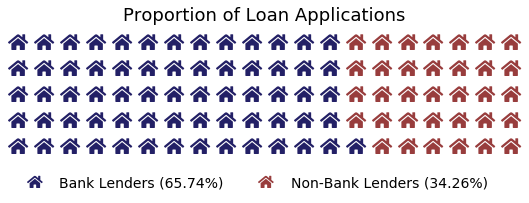

In [38]:
data = {'Bank Lenders': round(prop_dict[1]/sum(prop_dict.values())*100, 2),
        'Non-Bank Lenders': round(prop_dict[0]/sum(prop_dict.values())*100, 2)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    title={
        'label': 'Proportion of Loan Applications',
        'loc': 'center',
        'fontdict': {
            'fontsize': 18
        }
    },
    colors=("#232066", "#983D3D"),
    labels=[f"{k} ({round(v / sum(data.values()) * 100,2)}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol':len(data),'framealpha': 0,
        'fontsize': 14},
    icons='home', icon_size=18, 
    icon_legend=True,
    figsize=(8,6)
)

**Observation:** Out of the 431,272 prospective home buyers in New York State, 65.74% utilized traditional bank lenders while 34.26% utilized non-bank lenders. While bank lenders still account for two-thirds of all applications, the popularity of non-bank lenders is evident as it makes up over one-third of all applications. This signals that a majority of home buyers are becoming increasingly knowledgeable in their options when it comes to mortgages and are aware that mortgages do not only originate in banks, which is traditionally known to be the case. <br> <br>
Several factors could contribute to this proportion we observe; the first being that bank lenders are generally much more accessible to home buyers than non-bank lenders. For example, bank lender giants such as JPMorgan Chase & Co and Bank of America have 5,000 and 4,300 financial branches respectively across the United States. When pitted against a non-bank lender such as Better Mortgage Corportion, which typically is of smaller scale, bank lenders have much greater presence and ability to attract home buyers. The deep-rooted knowledge most Americans have on the home-buying process generally leads them to the traditional bank route, as their institution for personal banking matters becomes the most accessible financial institution to originate their loan. 
<br> <br>
On the other hand, the rise of non-bank lenders can partially be accredited to the technological evolution we have been experiencing in the past decade. Home buyers no longer have to visit their local bank branch to obtain a loan. The rise of the Internet and optimal search engines have given home buyers easy access to other choices right at their fingertips. With a simple Google search, home buyers are able to "shop" around for the best deal, not only on their homes, but on the mortgage buying process. Non-bank lenders can easily excel in this arena because most are structured to be more technologically advanced and are also very customer service based, wanting to make the entire process as easy as possible. This is usually not the case when it comes to bank loaners, who are confined by traditional processes and the bureaucratic process of approving loans. Buying a home is stressful as it is, so the appeal of non-bank lenders with their various perks can be very attractive.

**A mortgage interste rate is one of the most important factor for an applicant when determining if a loan is right for them. As so, let's examine the average interest rate between bank lenders and non-bank lenders.**

In [39]:
# dataframe represents approved loans via bank lender institutions
bank_lender = approved[approved['type']==1].reset_index(drop=True)
bank_lender.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0


In [40]:
# dataframe represents approved loans via non-bank lender institutions
non_bank_lender = approved[approved['type']==0].reset_index(drop=True)
non_bank_lender.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type
0,2552.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36005.0,C,1.0,1.0,1.0,1.0,585000.0,85.0,5.00,6758.84,2416.60,360.0,685000.0,1.0,2,106.0,36%-49%,7.0,Asian,Asian,1.0,2.0,45-54,35-44,10.0,96.67,79300.0,0.0
1,2553.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36103.0,C,1.0,1.0,2.0,1.0,355000.0,NaN,5.12,18348.44,9438.28,360.0,365000.0,1.0,1,83.0,50%-60%,7.0,White,NaN,1.0,5.0,35-44,9999,10.0,81.44,124000.0,0.0
2,2554.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36081.0,C,1.0,1.0,1.0,1.0,785000.0,80.0,4.88,17283.84,12320.00,360.0,985000.0,1.0,2,308.0,30%-<36%,7.0,Asian,Asian,1.0,2.0,35-44,35-44,10.0,94.42,79300.0,0.0
3,2555.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36103.0,C,1.0,1.0,2.0,1.0,405000.0,NaN,5.12,15369.73,4504.30,360.0,415000.0,1.0,1,90.0,50%-60%,7.0,White,NaN,2.0,5.0,45-54,9999,10.0,37.44,124000.0,0.0
4,2556.0,"ASSOCIATED MORTGAGE BANKERS, INC.",36119.0,C,1.0,1.0,1.0,1.0,585000.0,80.0,5.00,5209.11,1485.00,360.0,725000.0,1.0,1,261.0,36%-49%,7.0,White,NaN,1.0,5.0,35-44,9999,10.0,26.74,79300.0,0.0


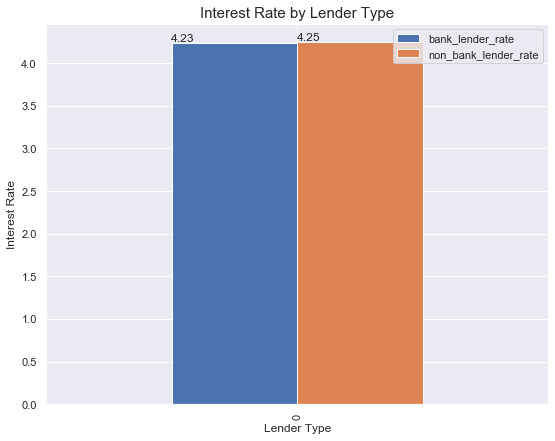

In [41]:
cols = ['bank_lender_rate', 'non_bank_lender_rate']
index = [0]
interest_rate_df = pd.DataFrame(index=index, columns=cols)
interest_rate_df['bank_lender_rate'] = round(bank_lender['interest_rate'].mean(), 2)
interest_rate_df['non_bank_lender_rate'] = round(non_bank_lender['interest_rate'].mean(), 2)
sns.set(style="darkgrid")
ax = interest_rate_df.plot(kind='bar', figsize=(9,7));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Lender Type');
plt.ylabel('Interest Rate');
plt.title("Interest Rate by Lender Type", fontsize=15);

**Observation:** Within the world of mortgages, everyone wants to boast of the lowest interest rate to bring in more home-buyers. In actuality, the average is not that far off comparing the two lender types with the bank lender having a marginally lower rate.
<br><br>
The question that arises is, who would benefit more from which type of loan? What does this mean to borrowers when they are looking for a mortgage? - short answer is that they have to lay out all the characteristics they have whether it's their credit, circumstances, market, home value, etc. to see where they can acquire the best deal. 
<br><br>
The long answer will mean a deeper dive into the types of applicants who go to each type of lender. The similar interest rate amongst the two can be because the preconditions individuals possess before they go to the lender. For instance, an individual with amazing credit, low debt-to-income ratio, more knowledge of the process, or anything else involved with the process, will very likely be able to obtain a lower interest rate at a traditional bank lender. Then the question becomes: will this same individual obtain an even lower rate at a non-bank lender? And vice versa for the buyers who went with the non-bank lenders?

In [42]:
# unique race values -> ['White', 'Hawaiian/Pacific', 'Asian', 'Black', 'N/A']
races_list = list(set(races.values()))

# make seperate df for bar chart
columns = ['Bank Lender', 'Non-bank Lender']
interest_rate_df = pd.DataFrame(index= races_list, columns=columns)

# values for 'Bank Lender' column
interest_rate_df['Bank Lender']=races_list
bank_race_proportion = dict(zip(races_list, [None]*len(races_list))) 
for k,v in bank_race_proportion.items():
    race_copy = bank_lender[bank_lender['applicant_race-1']==k].copy()
    interest_mean = round(race_copy['interest_rate'].mean(),2)
    bank_race_proportion[k] = interest_mean
interest_rate_df['Bank Lender'] = interest_rate_df['Bank Lender'].map(bank_race_proportion)

# values for 'Non-bank Lender' column
interest_rate_df['Non-bank Lender']=races_list
non_bank_race_proportion = dict(zip(races_list, [None]*len(races_list))) 
for k,v in non_bank_race_proportion.items():
    race_copy = non_bank_lender[non_bank_lender['applicant_race-1']==k].copy()
    interest_mean = round(race_copy['interest_rate'].mean(),2)
    non_bank_race_proportion[k] = interest_mean
interest_rate_df['Non-bank Lender'] = interest_rate_df['Non-bank Lender'].map(non_bank_race_proportion)

interest_rate_df

,Bank Lender,Non-bank Lender
Hawaiian/Pacific,4.61,4.25
White,4.26,4.24
Asian,4.16,4.33
Black,4.32,4.32
Other,4.06,4.22


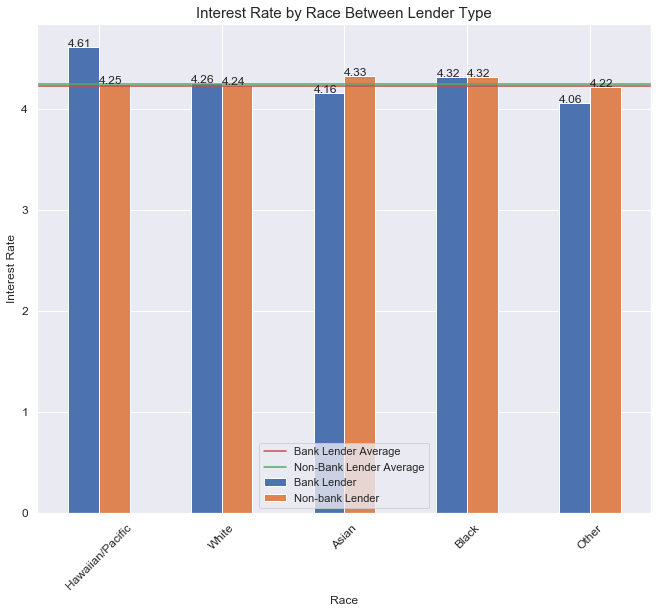

In [43]:
ax =interest_rate_df.plot(kind="bar", figsize=(11,9));
plt.title("Interest Rate by Race Between Lender Type", fontsize=15);
plt.xlabel('Race');
plt.ylabel('Interest Rate');
plt.yticks(fontsize=12);
plt.xticks(rotation=45, fontsize=12);
plt.axhline(y=round(bank_lender['interest_rate'].mean(), 2), color='r', linestyle='solid', label='Bank Lender Average')
plt.axhline(y=round(non_bank_lender['interest_rate'].mean(), 2), color='g', linestyle='solid', label='Non-Bank Lender Average')
plt.legend()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.00))

**Observation:** By graphing interest rates by race groups, White homebuyers have interest rates on par with the overall interest rate at 4.24%. Black homebuyers have the same interest rate average at both banks and non-bank lenders at 4.32%, which is .08% higher than the average. Both White and Black homebuyers have no significant difference between the types of lenders and rates they receive. Asian homebuyers experience lower interest rates than the average when they go through a traditional bank lender and a higher than average when they go through a non-bank by .17%. 
<br><br>
Like Figure 8, the data shown here shows that both banks and non-bank lenders are able to offer competitive rates. And the same questions exist: what pre-conditions lead homebuyers to go with a bank or a non-bank? Why do Black homebuyers experience higher rates on average? Why are the interest rates of non-bank and bank differ so significantly for Asians? 

**Comparing the distribution of different races across both `bank_lender` df and `non_bank_lender` df can better tell us if there is a certain demographic in the populaiton that may be more likely to finance with a non-bank lender or bank lender.**

In [44]:
# unique race values -> ['White', 'Hawaiian/Pacific', 'Asian', 'Black', 'N/A']
races_list = list(set(races.values()))

# make seperate df for bar chart
columns = ['Bank Lender', 'Non-bank Lender']
race_df = pd.DataFrame(index= races_list, columns=columns)

# values for 'Bank Lender' column
race_df['Bank Lender']=races_list
bank_race_proportion = (bank_lender['applicant_race-1'].value_counts(normalize=True)*100).to_dict()
race_df['Bank Lender'] = race_df['Bank Lender'].map(bank_race_proportion)

# values for 'Non-bank Lender' column
race_df['Non-bank Lender']=races_list
non_bank_race_proportion = (non_bank_lender['applicant_race-1'].value_counts(normalize=True)*100).to_dict()
race_df['Non-bank Lender'] = race_df['Non-bank Lender'].map(non_bank_race_proportion)

race_df

,Bank Lender,Non-bank Lender
Hawaiian/Pacific,0.233132,0.197892
White,70.938647,68.391793
Asian,9.317376,6.980722
Black,4.074539,8.807030
Other,15.436305,15.622563


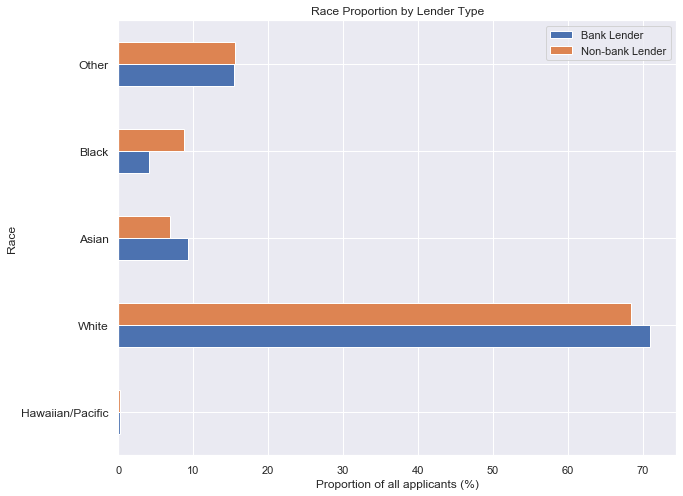

In [45]:
ax = race_df.plot(kind="barh", figsize=(10,8));
plt.title("Race Proportion by Lender Type");
plt.xlabel('Proportion of all applicants (%)');
plt.ylabel('Race');
plt.yticks(fontsize=12);

**Observation:** Given this barplot and as stated above, there is an evident lack of representation of Hawaiian/Paific applicants which will hinder our analysis regarding that race group. Nonetheless, we see that more Asian and White applicants apply for loans via bank lenders. When considering our prior observation that roughly two-thirds of applicants apply via bank lenders, the difference in percentage, show that Asian and White applicants apply vai non-bank lenders at a rate that is higher than 34.26%. For Black applicants, non-bank applicants double that of bank appplicants. 
<br> <br>
Apart from Black applicants, we observe a similar distribution amongst bank lenders and non-bank lenders. An appealing characterisitc of non-bank lenders is their flexibility and willingness to work with applicants who's credit or income is low. Let's see if this is actually the case and how income and race influences which path an applicant pursues.

In [46]:
# income bins to sort and group applicants' income
bins = [0,50, 100, 150, 200, 250, 300, 330000]
# group income observations into appropriate bin
loans['binned_income'] = pd.cut(loans['income'], bins)
# view and verify grouping executed as expected
loans.head()

,index,lender,county_code,conforming_loan_limit,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,co-applicant_race-1,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,denial_reason-1,tract_minority_population_percent,ffiec_msa_md_median_family_income,type,binned_income
0,0.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,525000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,309.0,NaN,1111.0,White,White,2.0,2.0,65-74,65-74,10.0,31.53,96700.0,1.0,"(300, 330000]"
1,1.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,124.0,NaN,1111.0,White,White,1.0,2.0,25-34,<25,10.0,16.31,96700.0,1.0,"(100, 150]"
2,2.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,445000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,196.0,NaN,1111.0,White,White,1.0,2.0,35-44,35-44,10.0,13.60,96700.0,1.0,"(150, 200]"
3,3.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,1.0,235000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,137.0,NaN,1111.0,White,NaN,1.0,5.0,25-34,9999,10.0,43.56,96700.0,1.0,"(100, 150]"
4,4.0,Walden Savings Bank,36071.0,C,1.0,2.0,1.0,31.0,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,133.0,NaN,1111.0,Black,Black,1.0,2.0,65-74,55-64,10.0,65.52,96700.0,1.0,"(100, 150]"


In [47]:
# binned_income is of type float, we want to represent as an interval and this dict allows us to map values
bin_map = {
    0:'0',
    50:"(0,50]",
    100:"(50,100]",
    150:"(100,150]",
    200:"(150,200]",
    250:"(200,250]",
    300:"(250,300]",
    330000:"(300,330000]"
}

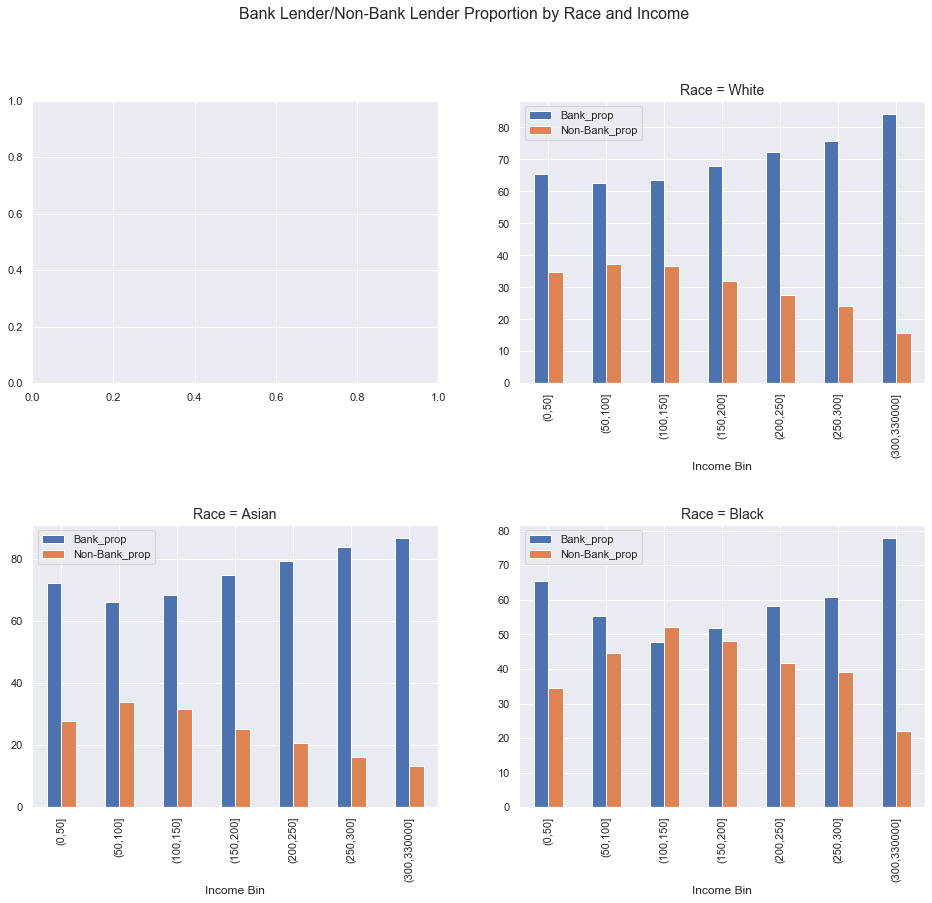

In [48]:
# cluster charts into 2x2 for direct comparison purposes  -> code below sets up visualization format
nrows = 2
ncols = 2
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(16, 13))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Bank Lender/Non-Bank Lender Proportion by Race and Income', fontsize=16)

for race, axis in zip(races_list, axes):
    # exclude Hawaiian/Pacific due to lack of representative data
    if race != 'Hawaiian/Pacific':
        # df storing rows of selected race
        df = loans[loans['applicant_race-1']==race].copy()
        # bank df stores all bank lender applications
        bank = df[df['type']==1].copy()
        # store values to map into df column
        bank_values = bank['binned_income'].value_counts().to_dict()
        
        # non_bank df stores all non-bank applications
        non_bank = df[df['type']==0].copy()
        # store values to map into df column
        non_bank_values = non_bank['binned_income'].value_counts().to_dict()
        
        # columns for df to plot
        columns = ['Income Bin', 'Bank Lender', 'Non-Bank Lender']
        # build df to map and plot values
        race_income_df = pd.DataFrame(columns=columns)        
        # fill columns with income bin values to prepare mapping
        race_income_df['Income Bin'] = bins
        race_income_df['Bank Lender'] = bins
        race_income_df['Non-Bank Lender'] = bins
        
        # map appropriate dict to respective columns
        race_income_df['Bank Lender'] = race_income_df['Bank Lender'].map(bank_values)
        race_income_df['Non-Bank Lender'] = race_income_df['Non-Bank Lender'].map(non_bank_values)
        race_income_df['Income Bin'] = race_income_df['Income Bin'].map(bin_map)
        # exclude first row as it represents income of 0
        race_income_df.drop(race_income_df.index[0], inplace=True)
        
        # want each bar to be normalized in respect to its bin and not overall distribution
        race_income_df['Total Applicant']= race_income_df.sum(axis=1)
        race_income_df['Bank_prop'] = round((race_income_df['Bank Lender']/race_income_df['Total Applicant'])*100,2)
        race_income_df['Non-Bank_prop'] = round((race_income_df['Non-Bank Lender']/race_income_df['Total Applicant'])*100,2)

        huh = race_income_df[['Income Bin', 'Bank_prop', 'Non-Bank_prop']].copy()
        
        # plot df for each race
        huh.set_index('Income Bin').plot(kind='bar', grid=True, ax=axis).set_title('Race = {}'.format(str(race)), fontsize=14);
#         plt.xticks(rotation=45, fontsize=12);

**Observation:** The clustered bar charts above provide insight into how income and race influences an applicant's decision to finance with a bank lender or non-bank lender. Keeping in mind that bank lenders consitutues two-thirds of all applicants and the data is processed in which each income bin is normalized to 100%, we expect to see every Orange bar (Non-Bank) hovering around 34% and every Blue bar (Bank) hovering around 66%. This is visually expressed when the Orange bar (Non-Bank) is half the height of the Blue bar (Bank). This is our basis for comparison across income bins as Blue/Orange bars that do not meet our expected distribution of 66/33 signifies there is a bias higher proportion of bank lenders or non-bank lenders that is directly correlated to race or income.
<br><br>
**Asian:** Examining Asian appplicants, we see that applicants whose income ranges from \\$50k to \\$150k adheres to our expected observation, that non-bank lenders constitutues 33% of the data within the bin and bank lenders 66%. When we look at polar ends, our expectation does not hold as the distribution is more extreme. For Asians whose incomes range below \\$50k, 73% financed with Bank lenders and 27% with Non-Bank lenders. This shows that Asians whose income is below \\$50k finance with Bank lenders at a 7% higher rate than the overall distribution. On the opposite end, as income increases from \\$150k, more than 66% of each income bin finance with bank lenders. We see that across all income bins, Asians either finance with bank lenders at our expected 66% rate that increases in relation to income. 
<br><br>
**White:** For White applicants, we can observe a similar distribution to Asians but with slight differences across bins. Appplicants' whose income are under \\$200k follows our expected distribution of roughly one-thirds non-bank lenders and two-thirds bank lenders. Unlike Asians who fall within the (0,50] income bin that reflected a higher proportion of bank lenders, this is not the case for White applicants under the same income bin. For incomes over \\$200k, White applicants finance with bank lenders at a rate higher than 66%, reaching as high as 85% disparity. Like the distribution of Asians, White distribution exhibits that across no income bins do we see non-bank lenders proportion exceed past its expected value of 34%. 
<br><br>
**Black:** Unlike our White and Asian applicants' data, the distribution of our Black applicants' data has greater variance amongst income bins. Black applicants whose income is below \\$50k meets our expected 66%-33% distribution, but non-bank lender percentages rises substantially as income rises. For Black applicants whose income falls between \\$100k and \\$200k, there is an obvious emphasis on non-bank lenders as approximately half of applicants within this income bin finance with non-bank lenders rather than just one-thirds. For incomes exceeding \\$200k, Black applicants still finance with non-bank lenders at a rate of 40%. This distribution is extremely practical in that it shows that within the housing demographic as a whole, Black applicants are much more likely to finance with non-bank lend
<br><br>
**Takeaway:** The distributions and charts illustrated above are practical in its ability to highlight certain trends and the financial routes expressed by different racial/income groups within the housing demographic. Black applicants are much more likely to finance with non-bank lenders, especially when their income falls between \\$50k-\\$250k. From this information, we may question why Black applicants finance with non-bank lenders at a much greater rate than Asians or Whites. For Asians and Whites, we see that as income falls below \\$100k, these applicants apply via non-bank lenders at our expected rate of 34% while those of higher income finance with bank lenders at a substantially higher rate. What is clear across all our distributions is that as income exceeds \\$200k, bank lenders consitute the majority of applicants regardless of race. We may acknowledge that such applicants with high incomes typically yield better credit scores and have higher chances of securing their approved desired loan. As such, the incentives that non-bank lenders offer such as competitive rates, higher loan amounts and leniency with credit may be irrelevant amongst higher income applciants. On the lower end of the income spectrum, these applicants have less income to cover debt and poses as much greater risk for lenders, but a prime marketing target for non-bank lenders. Let's proceed to examine approval rates by lender type and analyze whether lower income applicants with higher debt-to-income ratios really have approval rates with non-bank lenders. 

**At this point in the analysis, we know bank lenders comprise of two-thires of all New York mortgage applications and non-bank lenders constituting roughly one-thirds. However, as shown within our analysis above, the distributions based on `race` and `interest_rate` across both types of lenders are strikingly similar and do not effectively explain the differences between the two lenders and why non-bank lenders are becoming more appealing. Both lenders offer an average rate of 4.24% and when analyzing which demographic of applicants are more likely to finance with non-bank lenders, we see that applicants who are Black and are of middle to low income are the most likely to finance with non-bank lenders as over 50% of such applicants do so in comparison to our 34 across all races and incomes. Furthermore, Asians of low and high income finance with bank lenders at a higher rate whereas middle income Asians finance with bank lenders at our expected 66%. We also see that regardless of race, those with high income finance with bank lenders at a much greater rate than non-bank lenders. This information complements the role of non-bank lenders, that is, appealing to applicants of low-income and those with lack-luster credit while offerring similar interest rates and potentialy higher approval rates. On the topic of applicants' credit, A critical factor in determining an applicant's elgibility for loan approval is their `debt_to_income_ratio` (DTI), the percentage of a consumer's monthly gross income allocated towards debt payment. Lenders typically favor applicants with <36% DTI ratio and those over 50% DTI are classified as high risk applicants that typically result in higher interst rates, lower loan approval, or denial. <br><br>
Let's look at approval/denial percentages by lender type.**

In [49]:
# dataframe of loans via bank lenders 
bank_lender_approve = loans[loans['type']==1].copy()
# dict stores values of approved/denied loans -> 1,2(approved), 3(denied)
action_dict = bank_lender_approve['action_taken'].value_counts().to_dict()
action_dict

{1.0: 181765, 3.0: 84926, 2.0: 7865}

In [50]:
bank_approval_rate = round((action_dict[1]+action_dict[2])/(sum(action_dict.values()))*100,2)
bank_approval_rate

69.07

**Overall approval rating for bank lenders is 69.07%, repeat the same process for non-bank lenders.**

In [51]:
# dataframe of loans via non-bank lenders
non_bank_lender_approve = loans[loans['type']==0].copy()
# dict stores values of approved/denied loans -> 1,2(approved), 3(denied)
action_dict2 = non_bank_lender_approve['action_taken'].value_counts().to_dict()
action_dict2

{1.0: 113476, 3.0: 23805, 2.0: 5782}

In [52]:
non_bank_approval_rate = round((action_dict2[1]+action_dict2[2])/(sum(action_dict2.values()))*100,2)
non_bank_approval_rate

83.36

**Non-bank approval rate is 83.36% as compared to 69.07% of bank lenders.**

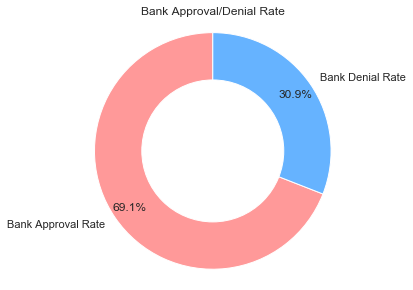

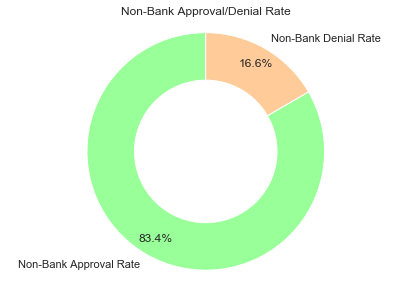

In [53]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bank Approval Rate', 'Bank Denial Rate'
# values taken from calculations made above
sizes = [bank_approval_rate, (100-bank_approval_rate)]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Bank Approval/Denial Rate")



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Non-Bank Approval Rate', 'Non-Bank Denial Rate'
sizes2 = [non_bank_approval_rate, (100-non_bank_approval_rate)]
#add colors
colors2 = ['#99ff99','#ffcc99']

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Non-Bank Approval/Denial Rate')

plt.show()

**Observation:** At a glance, non-bank lenders approved 83.4% of all their applicants whereas bank lenders approved applicants at a lower rate of 69.1%. Likewise, bank lenders denied applicants more often than non-bank lenders, 30.9% to 16.6%. Given that both types of lenders offer competitive interest rates, non-bank lenders are more appealing as their acceptance rate is reflective of them accepting higher risk applicants with lack-luster credit.
<br><br>
Overall, banks approve less and reject more, which is expected given the characteristics of traditional corporation banks. Banks typically operate with a sense of bureaucracy in place that results in processing systems that are very lenient and common in larger banks such as JPMorgan CHase & Co or Bank of America. Home loans from such banks follow a inflexible processs where home buyers have to be cookie cutters to get the loan they want by matching neccessary income/debt ratios, credit, purchasing power, etc. This aspect may contribute to why Bank lender rates are slightly lower than non-bank lenders, as the entire package of these individuals who are predisposed to be approved at banks are already more attractice and know exactly what they need and what loans they cans secure before applying via a bank lender. 
<br><br>
On the other hand, non-bank lenders approve more and reject less. Given that the majority of such lenders are of small scale institutions that lack the influence big banks possess, they are more lenient in terms of working with a home buyer to ensure their business. By focusing more on serving the consumer, such banks are willing to work around factors that banks are less inclined to deal with. As llustrated in charts above, non-bank lenders are more popular amongst applicants of low income and their flexibility may attract consumers with subpar credit/income-debt ratio. Given non-bank lenders approve more and provide a chance of home ownership to applicants rejected by banks, their slightly higher interest rate may account for the larger risk they bear with these applciants. 

**Let's proceed to view acceptance/denial rate in respect to applicant debt-to-income ratio**

In [54]:
bank_lender["debt_to_income_ratio"].value_counts()

36%-49%     76000
20%-<30%    37494
30%-<36%    31747
<20%        14657
50%-60%      7988
>60%         2172
Name: debt_to_income_ratio, dtype: int64

**Approved loans: proportion of applicants in response to debt to income bins and lender type**

In [55]:
approved_cols = ['Bank Lender', 'Non-bank Lender']
# bins used as DTI indices for our df
approved = approved[approved["debt_to_income_ratio"].notnull()]
dti_col = "debt_to_income_ratio"
approved_bins = approved[dti_col].value_counts().index
approved_dti_df = pd.DataFrame(index=approved_bins, columns=approved_cols)
approved_dti_df['Bank Lender'] = approved_dti_df.join(bank_lender[dti_col].value_counts())[dti_col]
approved_dti_df['Non-bank Lender'] = approved_dti_df.join(non_bank_lender[dti_col].value_counts())[dti_col]

approved_dti_df 

,Bank Lender,Non-bank Lender
36%-49%,76000,61920
20%-<30%,37494,15337
30%-<36%,31747,16799
<20%,14657,4738
50%-60%,7988,11074
>60%,2172,1115


**Denied loans: proportion of applicants in response to debt to income bins and lender type**

In [56]:
denied_bank_lender = denied[denied['type']==1].reset_index(drop=True)
denied_non_bank_lender = denied[denied['type']==0].reset_index(drop=True)

cols2 = ['Bank Lender', 'Non-bank Lender']
bins2 = denied[dti_col].value_counts().index
denied_dti_df = pd.DataFrame(index=bins2, columns=cols2)
denied_dti_df['Bank Lender'] = denied_dti_df.join(denied_bank_lender[dti_col].value_counts())[dti_col]
denied_dti_df['Non-bank Lender'] = denied_dti_df.join(denied_non_bank_lender[dti_col].value_counts())[dti_col]

denied_dti_df

,Bank Lender,Non-bank Lender
>60%,27530,3974
36%-49%,19433,7918
50%-60%,12683,4078
20%-<30%,7194,1909
30%-<36%,6494,1925
<20%,4781,1367


**Join 2 dataframes above**

In [57]:
j_dti_df = approved_dti_df.join(denied_dti_df, rsuffix='_denied', lsuffix='_approved')
j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied
36%-49%,76000,61920,19433,7918
20%-<30%,37494,15337,7194,1909
30%-<36%,31747,16799,6494,1925
<20%,14657,4738,4781,1367
50%-60%,7988,11074,12683,4078
>60%,2172,1115,27530,3974


In [58]:
# create 4 columns filled with index as temporary placeholder
j_dti_df['Bank Approval %'] = j_dti_df.index
j_dti_df['Non-Bank Approval %'] = j_dti_df.index
j_dti_df['Bank Denial %'] = j_dti_df.index
j_dti_df['Non-Bank Denial %'] = j_dti_df.index
j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied,Bank Approval %,Non-Bank Approval %,Bank Denial %,Non-Bank Denial %
36%-49%,76000,61920,19433,7918,36%-49%,36%-49%,36%-49%,36%-49%
20%-<30%,37494,15337,7194,1909,20%-<30%,20%-<30%,20%-<30%,20%-<30%
30%-<36%,31747,16799,6494,1925,30%-<36%,30%-<36%,30%-<36%,30%-<36%
<20%,14657,4738,4781,1367,<20%,<20%,<20%,<20%
50%-60%,7988,11074,12683,4078,50%-60%,50%-60%,50%-60%,50%-60%
>60%,2172,1115,27530,3974,>60%,>60%,>60%,>60%


In [59]:
def calculate_percentage(df, col1, col2, col3):
    "calculates proportion given 3 columns -> engineered specifcally for j_dti_df dataframe"
    debt_bins = dict(zip(list(df.index), [None]*len(list(list(df.index))))) 
    approved = df[col1].to_dict()
    denied = df[col2].to_dict()
    for k, v in debt_bins.items():
        debt_bins[k] = round(approved[k]/(approved[k]+denied[k])*100,2)
    df[col3] = df[col3].map(debt_bins)
    return(df)

# call function that maps correct approval/denial percentages under each of 4 created columns
calculate_percentage(j_dti_df, 'Bank Lender_approved', 'Bank Lender_denied', 'Bank Approval %')
calculate_percentage(j_dti_df, 'Non-bank Lender_approved', 'Non-bank Lender_denied', 'Non-Bank Approval %')
calculate_percentage(j_dti_df, 'Bank Lender_denied', 'Bank Lender_approved', 'Bank Denial %')
calculate_percentage(j_dti_df, 'Non-bank Lender_denied', 'Non-bank Lender_approved', 'Non-Bank Denial %')

j_dti_df

,Bank Lender_approved,Non-bank Lender_approved,Bank Lender_denied,Non-bank Lender_denied,Bank Approval %,Non-Bank Approval %,Bank Denial %,Non-Bank Denial %
36%-49%,76000,61920,19433,7918,79.64,88.66,20.36,11.34
20%-<30%,37494,15337,7194,1909,83.90,88.93,16.10,11.07
30%-<36%,31747,16799,6494,1925,83.02,89.72,16.98,10.28
<20%,14657,4738,4781,1367,75.40,77.61,24.60,22.39
50%-60%,7988,11074,12683,4078,38.64,73.09,61.36,26.91
>60%,2172,1115,27530,3974,7.31,21.91,92.69,78.09


In [60]:
def sort_dti_bins(df, col):
    df = df.copy()
    custom_sort = {"<20%": 1,
                   "20%-<30%": 2,
                   "30%-<36%": 3,
                   "36%-49%": 4,
                   "50%-60%": 5,
                   ">60%": 6}
    df["dti_rank"] = df[col].map(custom_sort)
    df.sort_values(["dti_rank"], inplace=True)
    return df

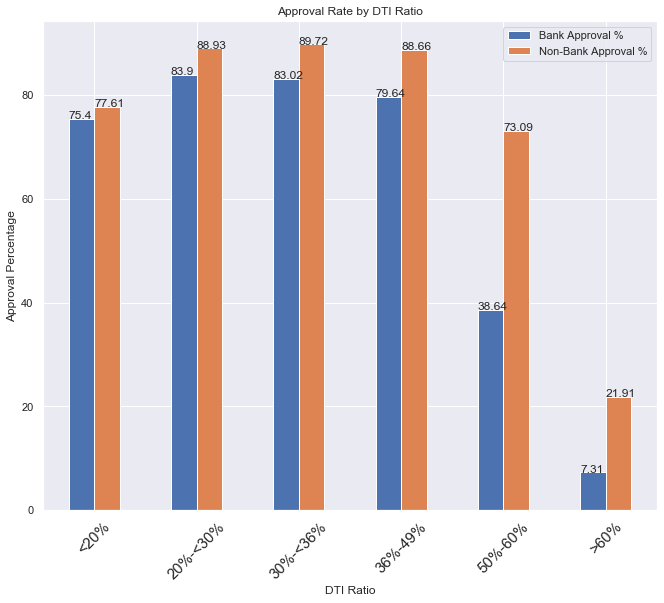

In [61]:
# rename index to bins--add new column representing bin category and sort
j_dti_df = j_dti_df.reset_index().rename({"index": dti_col}, axis=1)
j_dti_df = sort_dti_bins(df=j_dti_df, col=dti_col)
j_dti_df.set_index(dti_col, inplace=True)

# plot df using bar chart visualization
ax = j_dti_df[['Bank Approval %', 'Non-Bank Approval %']].plot(kind="bar", figsize=(11,9));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.00))
    
plt.xticks(rotation=45, fontsize=15);
plt.title('Approval Rate by DTI Ratio');
plt.xlabel('DTI Ratio');
plt.ylabel('Approval Percentage');

**Observation:** The two approval distributions between bank and non-bank lenders compare approval rates across different debt-to-income ratios. As introduced earlier, an applicant's debt-to-income ratio is the percentage of a consumer's onthly gross income allocated towards debt payment. DTI ratio is directly correlated with an applicant's credit with a higher DTI ratio signalling sub-par credit and lower ratio representing better credit. If the ratio is too high, lenders are less inclined to provide a loan or will do so at a much higher rate as there is a higher risk associated with repaying the loan. Following this statement, we see that both types of lenders approve aplicants at a similar rate when their DTI ratio is less than 20%. Lenders favor applicants with a DTI ratio under 36% and our distribution shows that for ratios between 20% and 36%, non-bank lenders approved on average 6% more applicants than bank lenders did. This disparity is even more extreme when considering DTI ratios greater than 50% which marks an applicant as high risk. Non-Bank lenders approval rate for applicants with 50%-60% DTI ratio was almost double that of Bank lenders and those deemed high risk of over 60%, non-bank lenders approval rate was three times that of bank lenders. The risk that banks lenders are willing to take is much lower than non-bank lenders when looking at approval rates with high risk applicants. In addition to our exploration on income, we see that applicants of low income and higher DTI ratios, which are correlated, are two to three times more likely to be approved under a non-bank lender. 

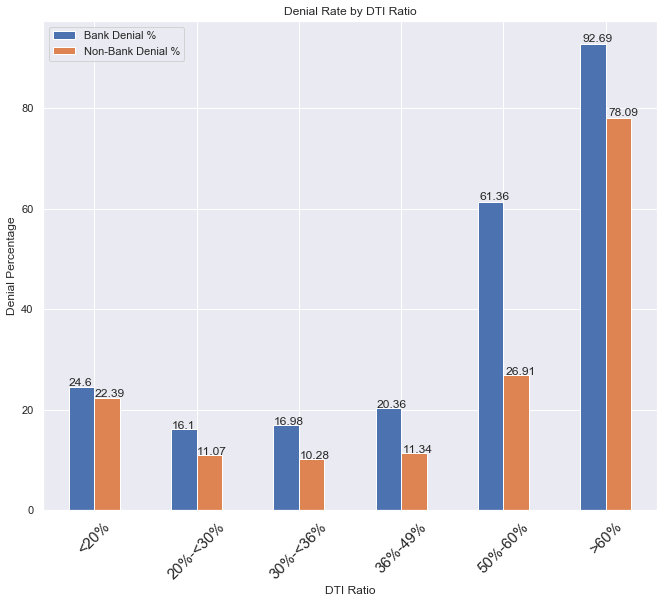

In [62]:
# plot bar chart for denial rates using denial columns
ax = j_dti_df[['Bank Denial %', 'Non-Bank Denial %']].plot(kind="bar", figsize=(11,9));

# place column/interest rate value on bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.xticks(rotation=45, fontsize=15);
plt.title('Denial Rate by DTI Ratio');
plt.xlabel('DTI Ratio');
plt.ylabel('Denial Percentage');

**Observation:** When visualizing denial rates by lender type across different DTI ration categories, our observation above is supported. For ratios under 50%, the denial rates between bank lenders and non-bank lenders were similarly distributed, but DTI ratios greater than 50% show a much greater denial rate by bank lenders. When looking solely at Bank lender denial rates, we see that the the majority of applcants whose DTI fall within 50% and 60% are denied while an astounding ~93% are denied when DTI is >60%. While non-bank lenders stil deny 78% of applicants within the >60% DTI bin, this denial rate is substantially lower than a bank lenders. In conclusion, we see strong evidence that suggests non-bank lenders are more appealing and a realistic route for those with higher DTI ratios or bad credit as such lenders are willingly to take on the risks. 

**What We Know So Far:** Our analysis to this point have shown that both types of lenders have very similar average interest rates and that non-bank lenders may be more appealing to applicants with sub-par credit or whose debt-to-income ratio is greater than 50%. Given a DTI ratio of 50%-60%, such applicants fare double the chances of approval and triple the chances of approval with >60% DTI when applying via a non-bank loan.

**Let's observe implications with race and income.**

In [63]:
# dict of value counts by race -> approved 
approved_race = approved['applicant_race-1'].value_counts().to_dict()
approved_race

{'White': 202336,
 'Other': 37431,
 'Asian': 23547,
 'Black': 17036,
 'Hawaiian/Pacific': 652}

In [64]:
# dict of value counts by race -> denied
denied_race = denied['applicant_race-1'].value_counts().to_dict()
denied_race

{'White': 67438,
 'Other': 19440,
 'Black': 11314,
 'Asian': 9473,
 'Hawaiian/Pacific': 995}

In [65]:
print("Denial Rate by Race:")

denial_rate={}
for k in denied_race:
    rate = round((denied_race[k]/(denied_race[k]+approved_race[k]))*100,2)
    # order of dict isnot guranteed -> find and set key
    denial_rate.setdefault(k,rate)

denial_rate

Denial Rate by Race:


{'White': 25.0,
 'Other': 34.18,
 'Black': 39.91,
 'Asian': 28.69,
 'Hawaiian/Pacific': 60.41}

**`denial_rate` dictionary represents denial rate by each race.<br>
Income may be a confounding factor when examining denial rate by race, let's examine the mean income by race.**

In [66]:
# calculate mean income for each race group
income_dict = denial_rate.copy()
for k,v in income_dict.items():
    income_df = loans[loans['applicant_race-1']==k].reset_index(drop=True)
    income = round(income_df['income'].mean(),2)
    income_dict[k] = income

In [67]:
income_dict

{'White': 159.41,
 'Other': 224.62,
 'Black': 111.11,
 'Asian': 162.02,
 'Hawaiian/Pacific': 109.0}

**Observation:** Out of the race groups that are identified, Asians recorded the highest average annual income at \\$162k and Blacks with the lowest average annual income at \\$111k.

In [68]:
# IDK WHAT THIS IS

approved_cols = ['Bank Lender', 'Non-bank Lender']
# bins used as DTI indices for our df
approved_bins = approved['debt_to_income_ratio'].value_counts().index
approved_dti_df = pd.DataFrame(index= approved_bins, columns=approved_cols)
approved_dti_df

,Bank Lender,Non-bank Lender
36%-49%,NaN,NaN
20%-<30%,NaN,NaN
30%-<36%,NaN,NaN
<20%,NaN,NaN
50%-60%,NaN,NaN
>60%,NaN,NaN


In [69]:
# columns for income dataframe
income_cols = ['Race', 'Denial Rate', 'Income']
income_df = pd.DataFrame(columns = income_cols)

# map dict values to appropriate columns
income_df['Race'] = list(income_dict.keys())
income_df['Income'] = income_df['Race']
income_df['Income'] = income_df['Income'].map(income_dict)
income_df['Denial Rate'] = income_df['Race']
income_df['Denial Rate'] = income_df['Denial Rate'].map(denial_rate)

income_df

,Race,Denial Rate,Income
0,White,25.00,159.41
1,Other,34.18,224.62
2,Black,39.91,111.11
3,Asian,28.69,162.02
4,Hawaiian/Pacific,60.41,109.00


**We now have a dataframe that lists the denial rate and average annual income by each race group. To understand the variance of denial rates, we'll compare each rate to an overall denial rate benchmark.**

In [70]:
bench_mark = round((denied.shape[0]/loans.shape[0])*100,2)
bench_mark

25.21

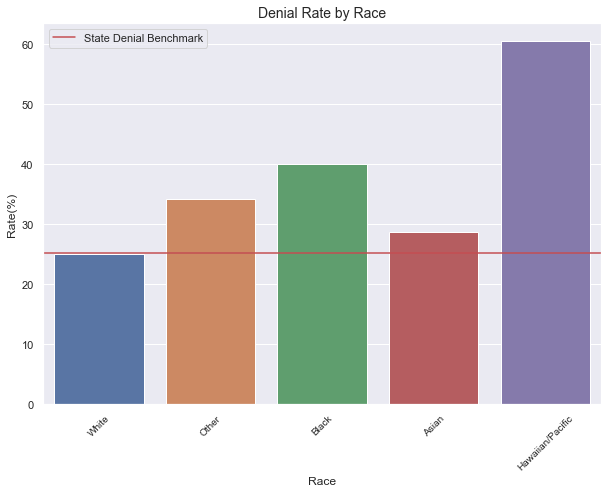

In [71]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(income_df['Race'], income_df['Denial Rate'], edgecolor='white').set_title('Denial Rate by Race', fontsize=14)
plt.axhline(y=bench_mark, color='r', linestyle='solid', label='State Denial Benchmark')
plt.xlabel("Race")
plt.ylabel("Rate(%)")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

**Observation:** With an overall denial rate of 25.21% across all races as indicated by the red horizontal line, we see that there are some races whose denial rate is greater than or less than the state average. With exception to Hawaiian/Pacific which we refrain from drawing conclusions from due to lack of data, observe that White applicants denial rate is slightly lower than that of the average. Black applicants experience the greatest disparity with a denial rate of 40% that is 15% over the state average. Next, we see Asians also experience a greater denial rate at 28%. Within the mortgage application process, an applicant is more likely given bad credit that is evident via high debt-to-income ratios. Higher debt-to-income ratio is typically a result of accruing debt despite a lower income. Let's examine if each races' average income is in line with its average denial rate. 

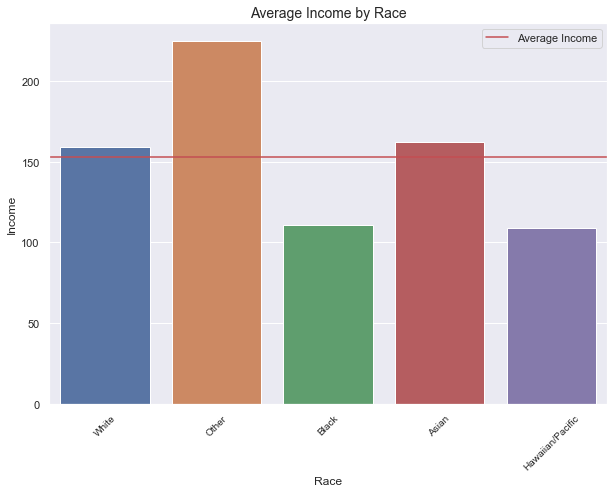

In [72]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(income_df['Race'], income_df['Income'], edgecolor='white').set_title('Average Income by Race', fontsize=14)
plt.axhline(y=income_df['Income'].mean(), color='r', linestyle='solid', label='Average Income')
plt.xlabel("Race")
plt.ylabel("Income")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

**Observation:** The chart above details the average income across our races. When coparing this chart to our denial rate chart directly above, we see that income is associated with denial rates. For White applicants, we see their average income is slightly above the overall average income and in relation, their denial rate sits slightly below the state denial benchmark. For Black applicants, their average income is approximately \\$40k below state average and in relation, their denial rate is 15% higher than the state average. In addition to our assumption that lower income results in higher debt-to-income ratios that in turn, increases denial rates, these charts highlight a strong association between income and denial rates that differ across races. White and Asian applicants have an average income hovering around the overall state income and in turn, their denial rates also hover aroung state denial rate averages. For Black applciants whose income is almost 33% lower than the state average, there is an evident increase in denial rates that suggests a strong crorrelaton between the two factors. 

**Let's proceed to examine whether these rates differ amongst bank lenders and non-bank lenders across different races.**

In [73]:
# list of races in our dataset
race_list = list(loans['applicant_race-1'].value_counts().to_dict())
# dict of races as keys initializes with None values
bank_race_dict = dict(zip(race_list, [None]*len(list(col_length))))
# copy dict for non-bank analysis
non_bank_race_dict = bank_race_dict.copy()
bank_race_dict

{'White': None,
 'Other': None,
 'Asian': None,
 'Black': None,
 'Hawaiian/Pacific': None}

In [74]:
def denial_by_lender(race_dict, bank):
    for k,v in race_dict.items():    
        approval = approved[approved['type']==bank].reset_index(drop=True)
        approval_count = len(approval[approval['applicant_race-1'] == k])
        denial = denied[denied['type']==bank].reset_index(drop=True)
        denial_count = len(denial[denial['applicant_race-1'] == k])
        race_dict[k] = round(((denial_count)/(denial_count+approval_count)*100),2)
    return(race_dict)

In [75]:
bank_race_dict = denial_by_lender(bank_race_dict, 1)
bank_race_dict

{'White': 30.11,
 'Other': 38.57,
 'Asian': 34.17,
 'Black': 53.63,
 'Hawaiian/Pacific': 68.17}

In [76]:
non_bank_race_dict = denial_by_lender(non_bank_race_dict, 0)
non_bank_race_dict

{'White': 14.82,
 'Other': 27.59,
 'Asian': 14.4,
 'Black': 22.32,
 'Hawaiian/Pacific': 25.0}

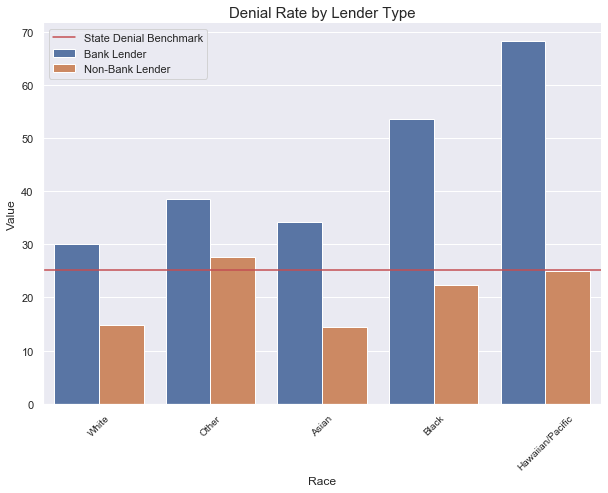

In [77]:
approval_race_df = pd.DataFrame({
    'Race': list(bank_race_dict.keys()),
    'Bank Lender': list(bank_race_dict.values()),
    'Non-Bank Lender': list(non_bank_race_dict.values())
})
fig, ax1 = plt.subplots(figsize=(10, 7))
tidy = approval_race_df.melt(id_vars='Race').rename(columns=str.title)
sns.barplot(x='Race', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
plt.axhline(y=bench_mark, color='r', linestyle='solid', label='State Denial Benchmark')
plt.legend()
plt.xticks(rotation=45, fontsize=10);
plt.title('Denial Rate by Lender Type',fontsize=15);

**Observation:** This chart illustrates that regardless of race, bank lenders deny applicants at a rate that is higher than the state average. On the other hand, we see that non-bank lenders deny all races at a rate under the state average with exception to race listed as "Other". Earlier in our analysis, we examined overall approval and denial rates between bank lenders and non-bank lenders that showed us bank lenders denied 30.9% of all applicants and non-bank lenders denying 16.6%. Using this information, we can see that some races such as White or Asian typically adhere to this distribution. However, for Black applicants, we see their denial rates for both types of lenders is substantially higher. Black aplicants were denied by bank lenders at a 53.63% rate compared to their overall 30.9%. Non-bank lenders denied 22.32% of Blacks compared to their 16.6% overall denial rate. What we can deduce from this is given a Black applicant, their chances of denial are doubled given they finance with a bank lender. The disparity between Black denial rates and overall denial rates for each lender type highlights the stark differences between bank lenders and non-bank lenders. For instance, bank lenders denied Black applicants at a rate. that is 23% higher than their average whereas non-bank lenders denied Blacks at a 6% higher rate. This shows that given an applicant's information, race, income, etc, there are clear advantages and disadvantages when choosing to finance with a bank lender of non-bank lender. 

## Question/Answer 

Prior to the start of our analysis, we proposed some questions that sought to guide our research and hopefully offer greater insight and intuition into the world of mortgage applications that have come to include a greater magnitude of non-bank lenders. Concluding our analysis, lets answer our questions using the insight we have garnered throughout:

1. Do applicants with specific given characteristics err more towards a non-bank lender or a bank lender?

2. Interest rates play a huge factor in buying a home; do banks and non-banks have competitive rates compared to each other?
**A:** 
<br><br>
3. Do interest rates differ amongst different races that makes a lender type more appealing to a specific race?
4. Do certain races of the demographic finance with non-bank lenders at a hgher rate than bank lenders?
5. When considering each race in respect to different incomes, do lower income applicants or higher income applicants finance with non-bank lenders? 
6. Non-Bank lenders yield a reputation of leniency towards applicants of poor credit, is this reflected by their aceptance/denial proportions when compared to the traditional bank lender acceptance/denial?
7. When examining different debt to income ratios, is one type of lender more likely to approve or deny an applicant over the other type?
8. Are there certain races within the demographic that are denied at a higher or lower rate?
9. How does the average income within a given race affect denial rates?
10. Do non-bank lenders approve more applicants within a race group more than a bank lender does? Given the information derived from our analysis above, why might this be?


## Conclusion 
Throughout this analysis and exploration of the 2018 New York State mortgage applications, we sought to examine the rise of non-bank lenders and how these lenders have challenged traditional bank lenders in providing prospective home buyers an alternate financing route with a redefined processing system. 

## Ways to improve
yes